<a href="https://colab.research.google.com/github/jagodek/machine-learning-basics/blob/main/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.cluster import KMeans,DBSCAN
from math import pow

In [2]:
uploaded = files.upload()

Saving ellipses.txt to ellipses.txt
Saving circles.txt to circles.txt
Saving blobs.txt to blobs.txt
Saving banknotes.csv to banknotes.csv
Saving moons.txt to moons.txt


In [3]:
ellipses = pd.read_csv(io.BytesIO(uploaded['ellipses.txt']),names =['x','y','z'])
blobs = pd.read_csv(io.BytesIO(uploaded['blobs.txt']),names =['x','y','z'])
moons = pd.read_csv(io.BytesIO(uploaded['moons.txt']),names =['x','y','z'])
circles = pd.read_csv(io.BytesIO(uploaded['circles.txt']),names =['x','y','z'])

sets = [blobs, circles, moons, ellipses]
sets_names = ["blobs","circles","moons","ellipses"]
ellipses_X = ellipses.iloc[:,:2]
ellipses_Y = ellipses.iloc[:,[2]]
blobs_X = blobs.iloc[:,:2]
blobs_Y = blobs.iloc[:,[2]]
moons_X = moons.iloc[:,:2]
moons_Y = moons.iloc[:,[2]]
circles_X = circles.iloc[:,:2]
circles_Y = circles.iloc[:,[2]]
for s,name in zip(sets,sets_names):
    print(name)
    print(s.shape)
    print(s.head())
    print(s.isna().sum())

blobs
(500, 3)
          x         y  z
0  1.103182  4.705777  0
1 -1.932846  3.642251  2
2 -2.034422  1.866002  2
3  1.616402  2.686831  0
4 -0.960010  4.492566  0
x    0
y    0
z    0
dtype: int64
circles
(500, 3)
          x         y  z
0 -0.667240  0.767885  0
1  0.400662  0.059620  1
2  0.363861  0.373178  1
3  0.078146 -0.486274  1
4  0.298390 -0.553928  1
x    0
y    0
z    0
dtype: int64
moons
(500, 3)
          x         y  z
0  0.669694 -0.434326  1
1  1.407503 -0.464530  1
2  0.848534  0.416112  0
3  0.450751  0.802704  0
4  1.970001  0.167788  1
x    0
y    0
z    0
dtype: int64
ellipses
(500, 3)
          x         y  z
0  1.730207 -1.848657  2
1  0.359788 -0.337610  2
2 -2.981336  3.080587  1
3  2.386856 -2.842995  2
4 -3.315642  0.656019  0
x    0
y    0
z    0
dtype: int64


In [4]:
def plot_clusters(data,clf):

    n = data.shape[1]

    data_X = data.iloc[:,:n-1].to_numpy()
    data_Y = data.iloc[:,[n-1]].to_numpy()

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    fig, ax = plt.subplots()

    

    label = clf.fit_predict(data_X)
    centroids = clf.cluster_centers_


    n = len(centroids)
    
    
    u_labels = np.unique(label)
    
    x = np.arange(len(u_labels))
    ys = [i+x+(i*x)**2 for i in range(len(u_labels))]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(ys)))

    for i,col in zip(u_labels,colors):
        ax.scatter(data_X[label == i , 0] , data_X[label == i , 1] , label = i, color=col)
    
    ax.scatter(centroids[:,0] , centroids[:,1] , s = pow(1/500*(len(centroids)+6),-1), color = 'k')
    ax.set_title("clusters "+ str(len(centroids)))
    fig.show()


In [5]:
def plot_clusters_arr(data,clf,index):
    n = data.shape[1]

    data_X = data.iloc[:,:n-1].to_numpy()
    data_Y = data.iloc[:,[n-1]].to_numpy()

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    fig, ax = plt.subplots((len(index)-1)//3+1,3,figsize=(3*6, ((len(index)-1)//3+1)*6))

    for i in range(len(index),len(ax.flat)):
        fig.delaxes(ax.flat[i])

    fig.tight_layout() 
    for p,ind in enumerate(index):

        clf.set_params(**{"n_clusters":ind})
        

        

        label = clf.fit_predict(data_X)
        centroids = clf.cluster_centers_


        n = len(centroids)
        
        
        u_labels = np.unique(label)
        
        x = np.arange(len(u_labels))
        ys = [i+x+(i*x)**2 for i in range(len(u_labels))]
        colors = plt.cm.rainbow(np.linspace(0, 1, len(ys)))

        for i,col in zip(u_labels,colors):
            ax.flat[p].scatter(data_X[label == i , 0] , data_X[label == i , 1] , label = i, color=col)
        
        ax.flat[p].scatter(centroids[:,0] , centroids[:,1] , s = pow(1/500*(len(centroids)+6),-1)+10, color = 'k')
        ax.flat[p].set_title("clusters "+ str(len(centroids)))
    
    fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


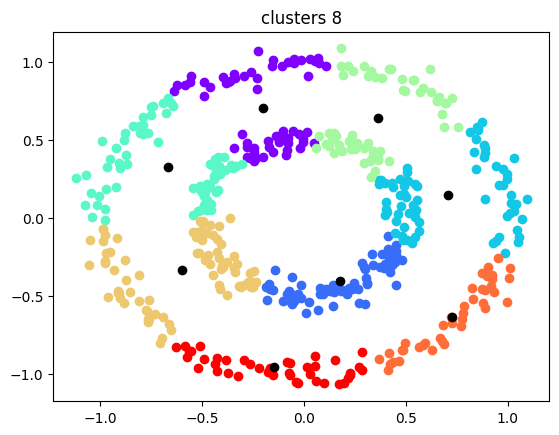

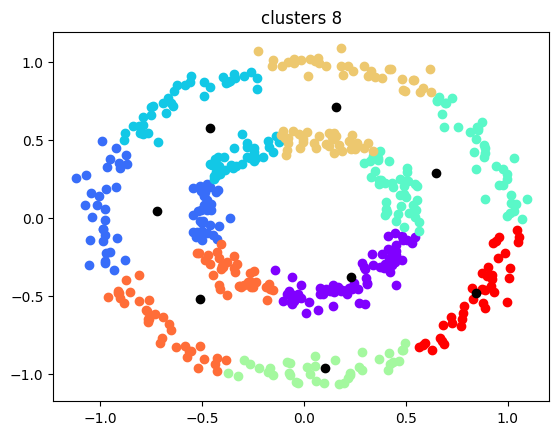

In [6]:
plot_clusters(circles,KMeans(8)) 
plot_clusters(circles,KMeans(8))
# two different clusters sets

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

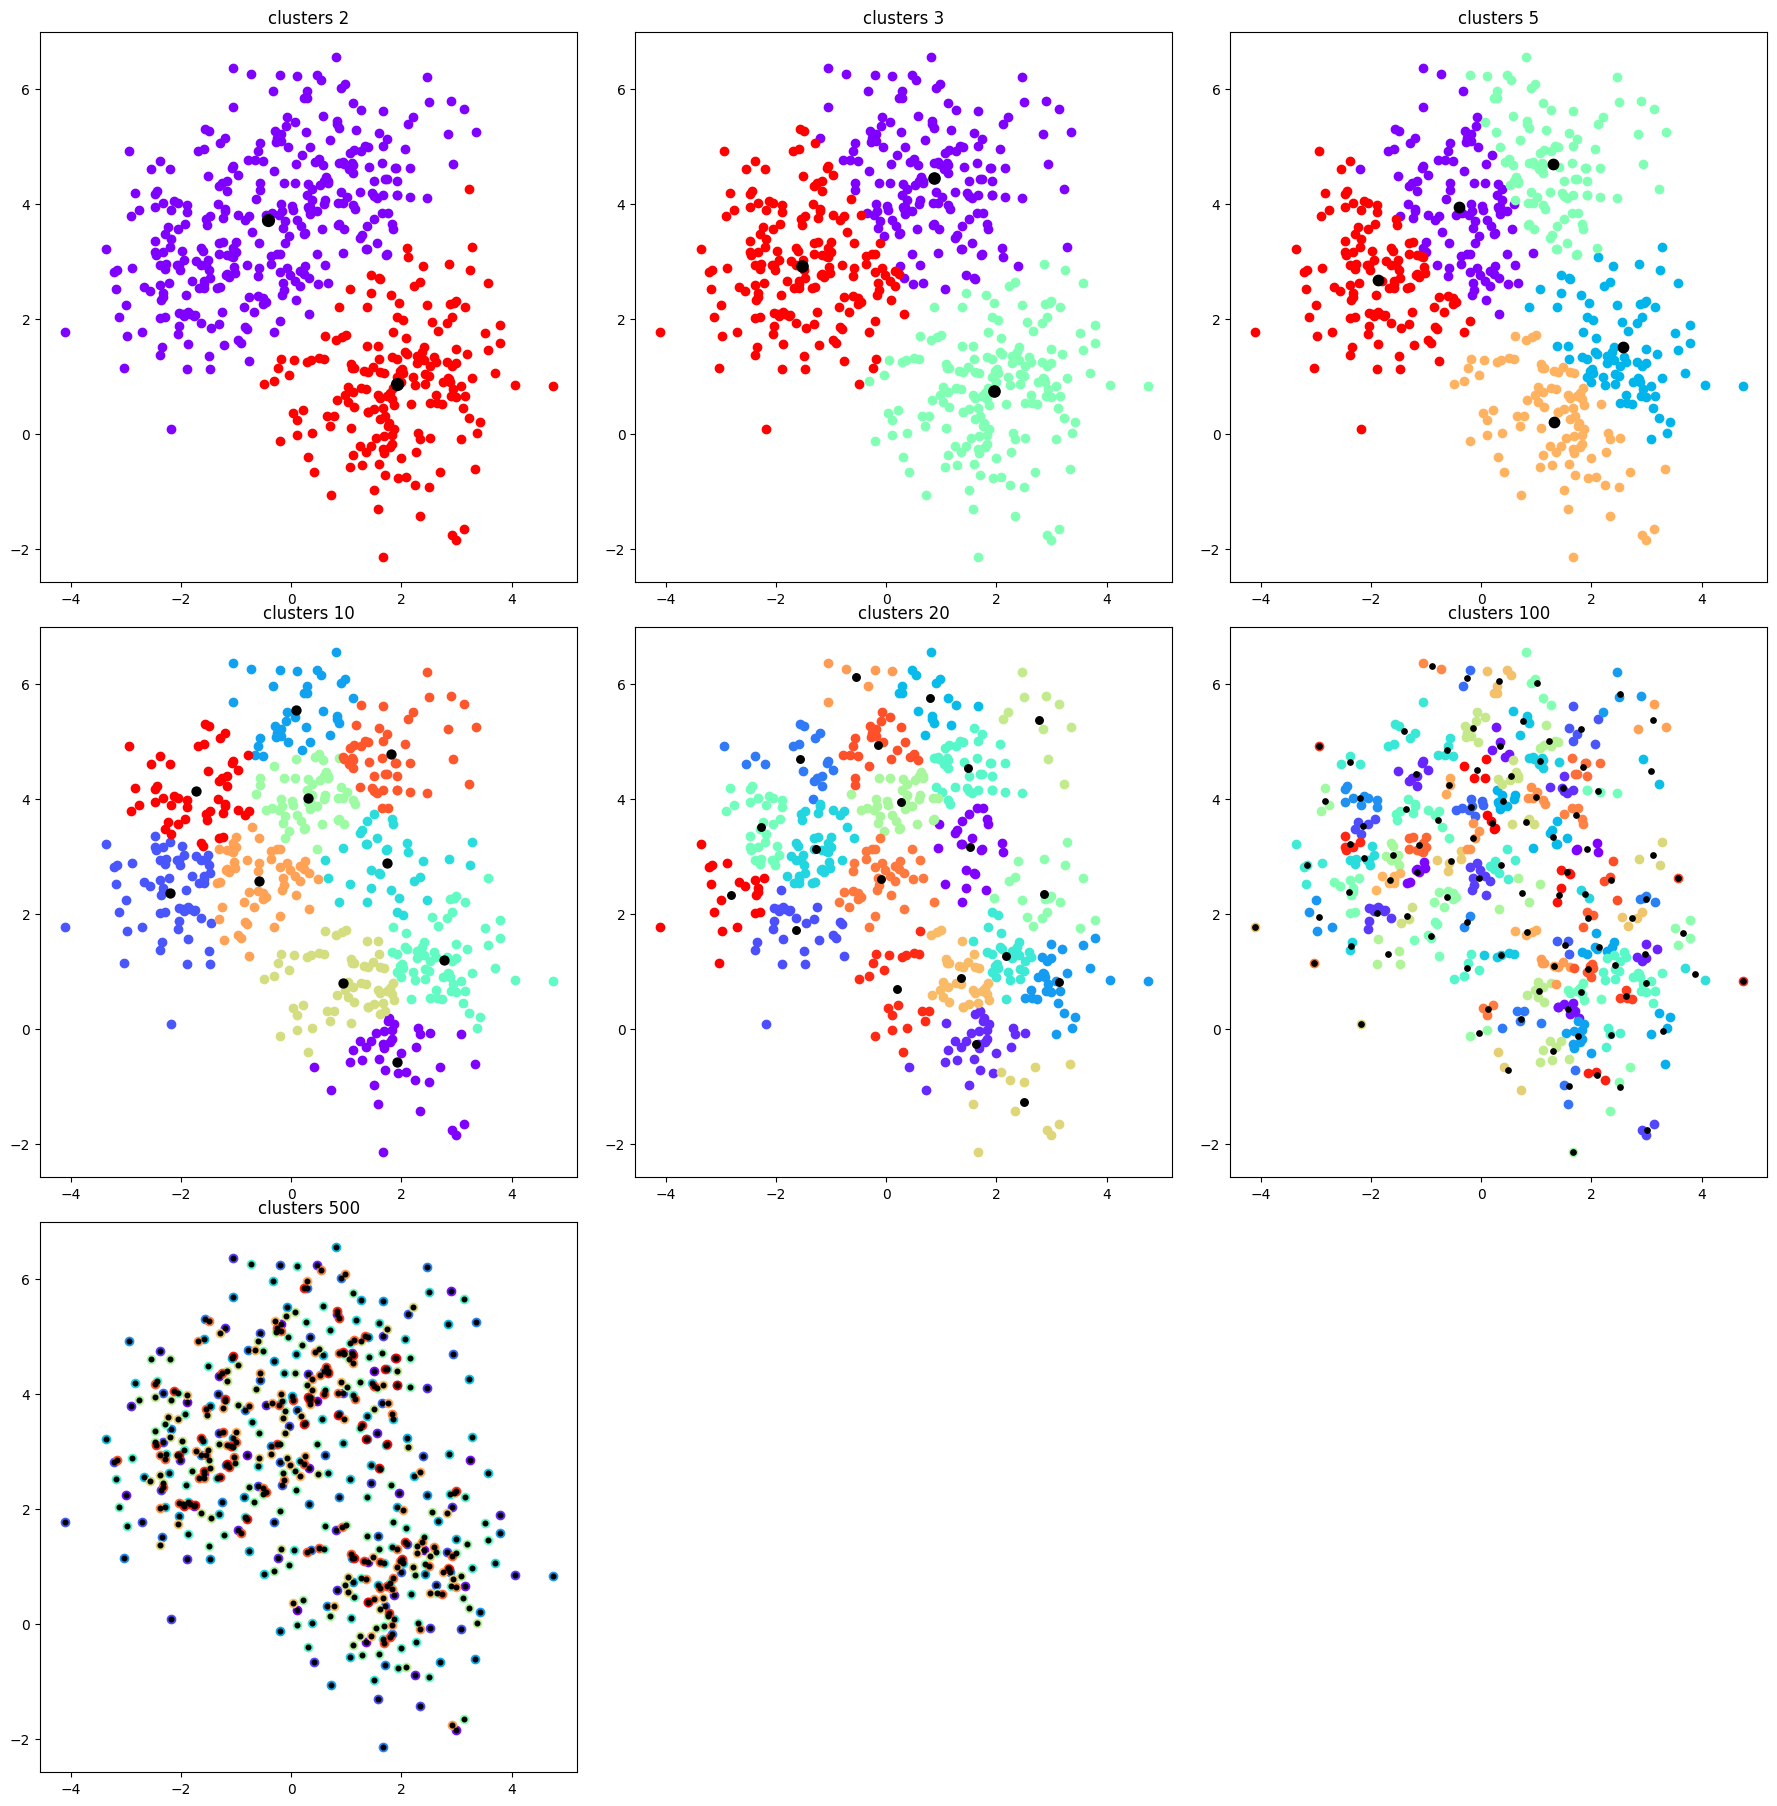

In [7]:
plot_clusters_arr(blobs,KMeans(),[2,3,5,10,20,100,500])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

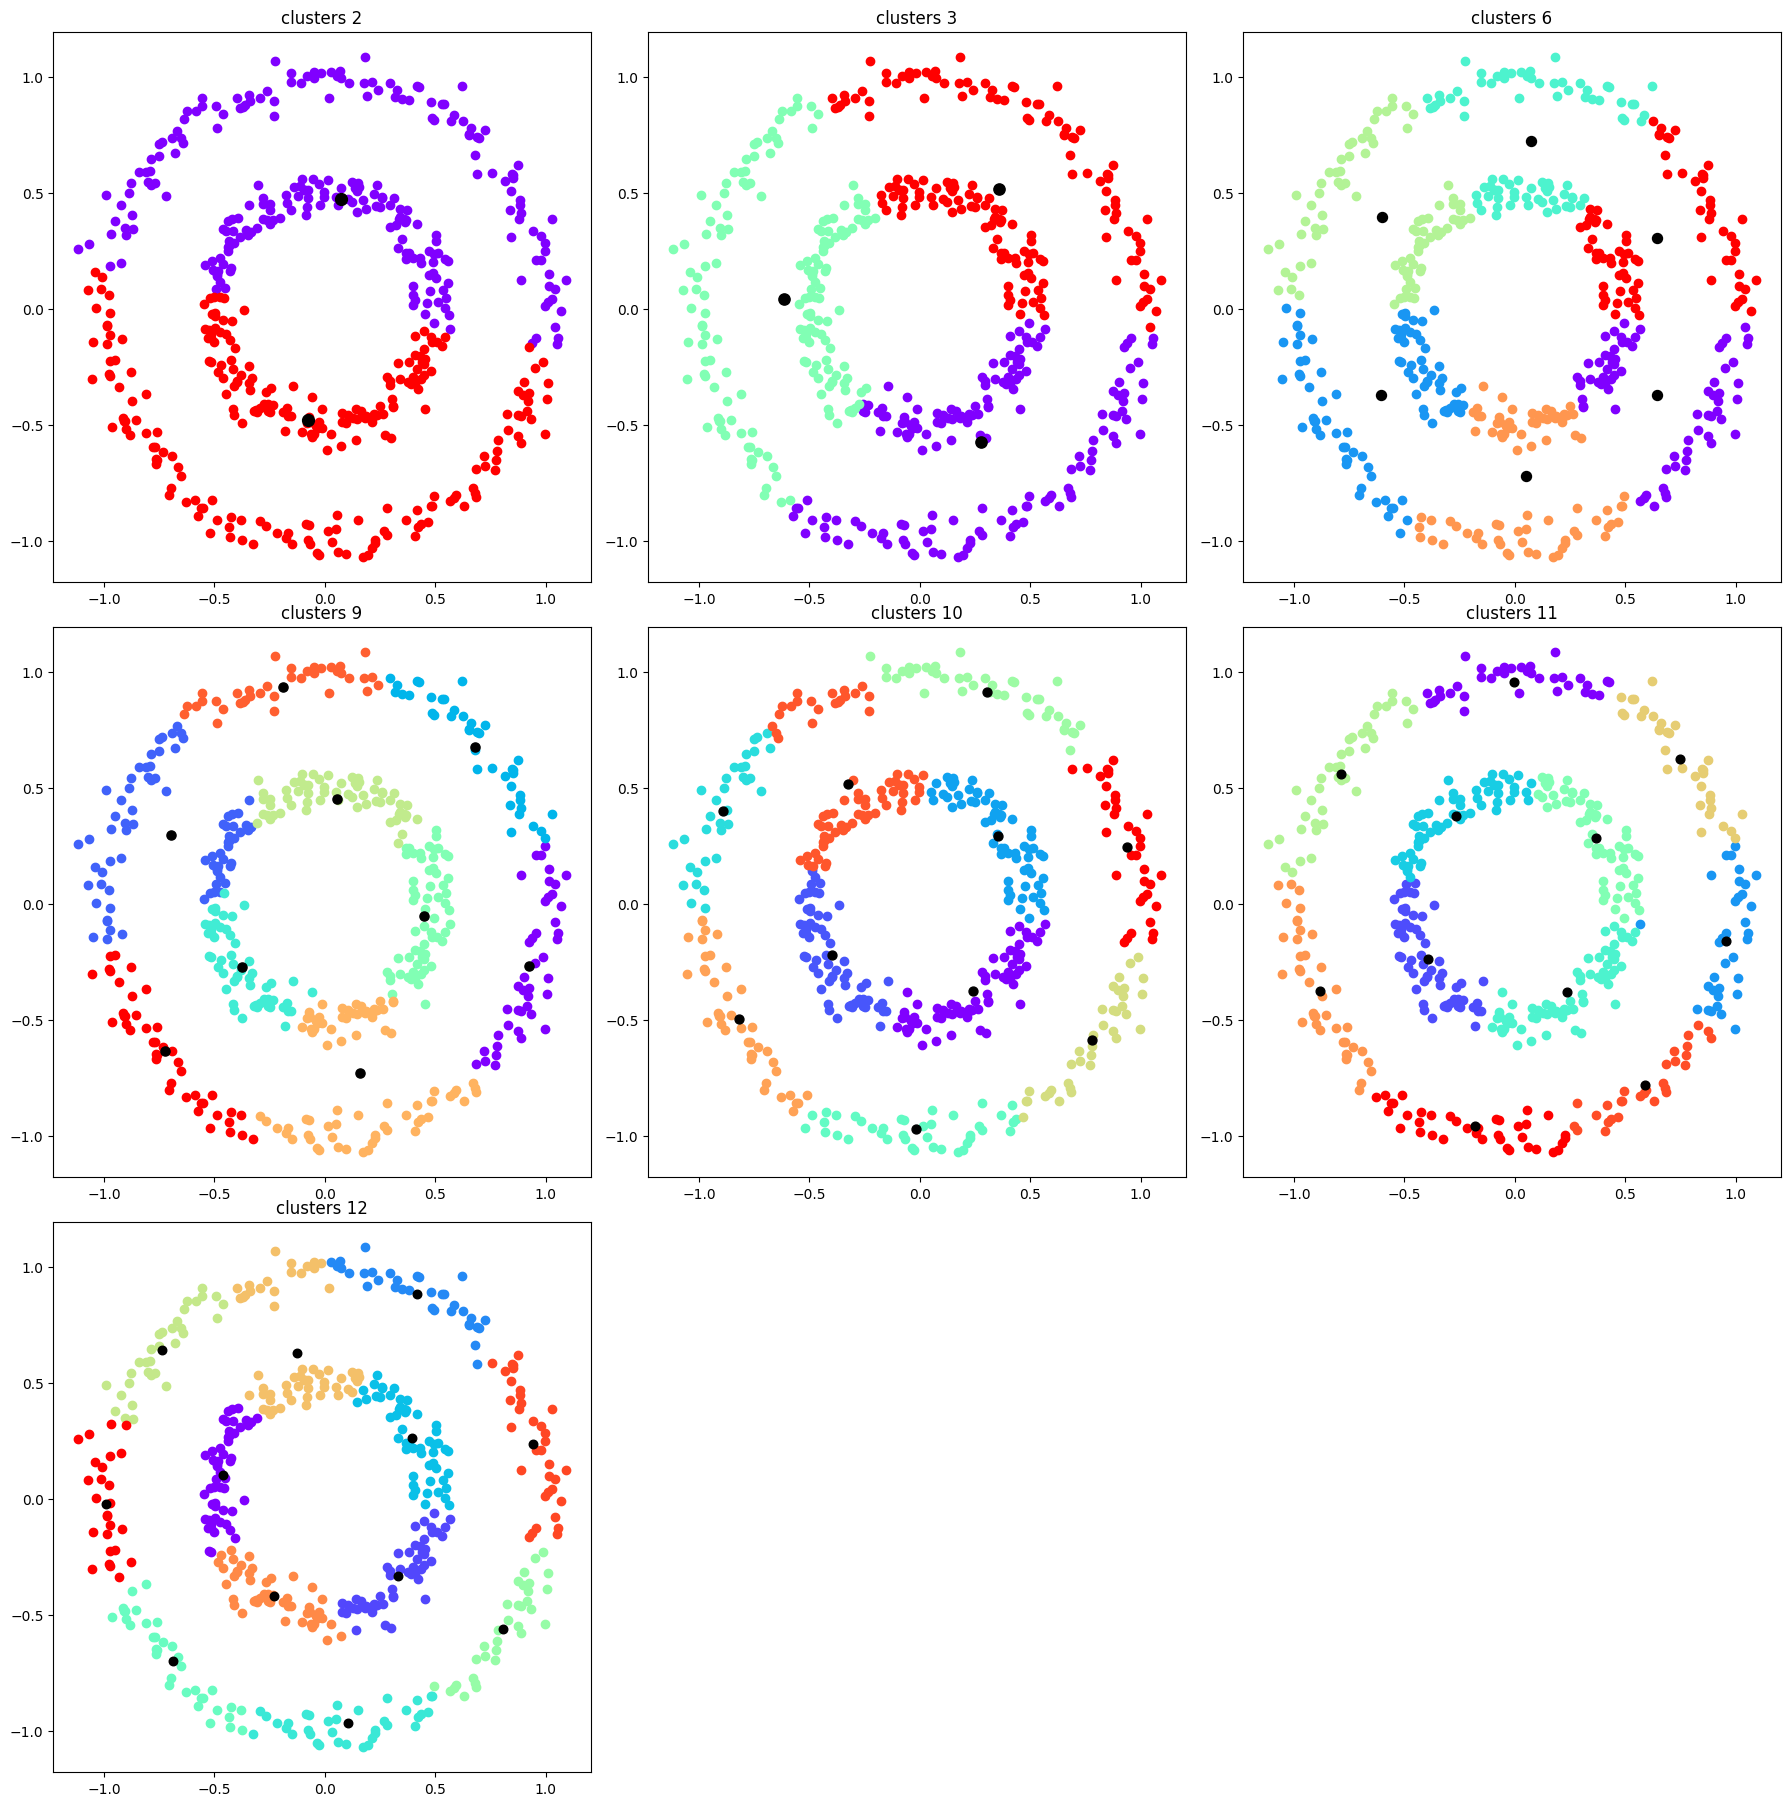

In [8]:
plot_clusters_arr(circles,KMeans(),[2,3,6,9,10,11,12])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

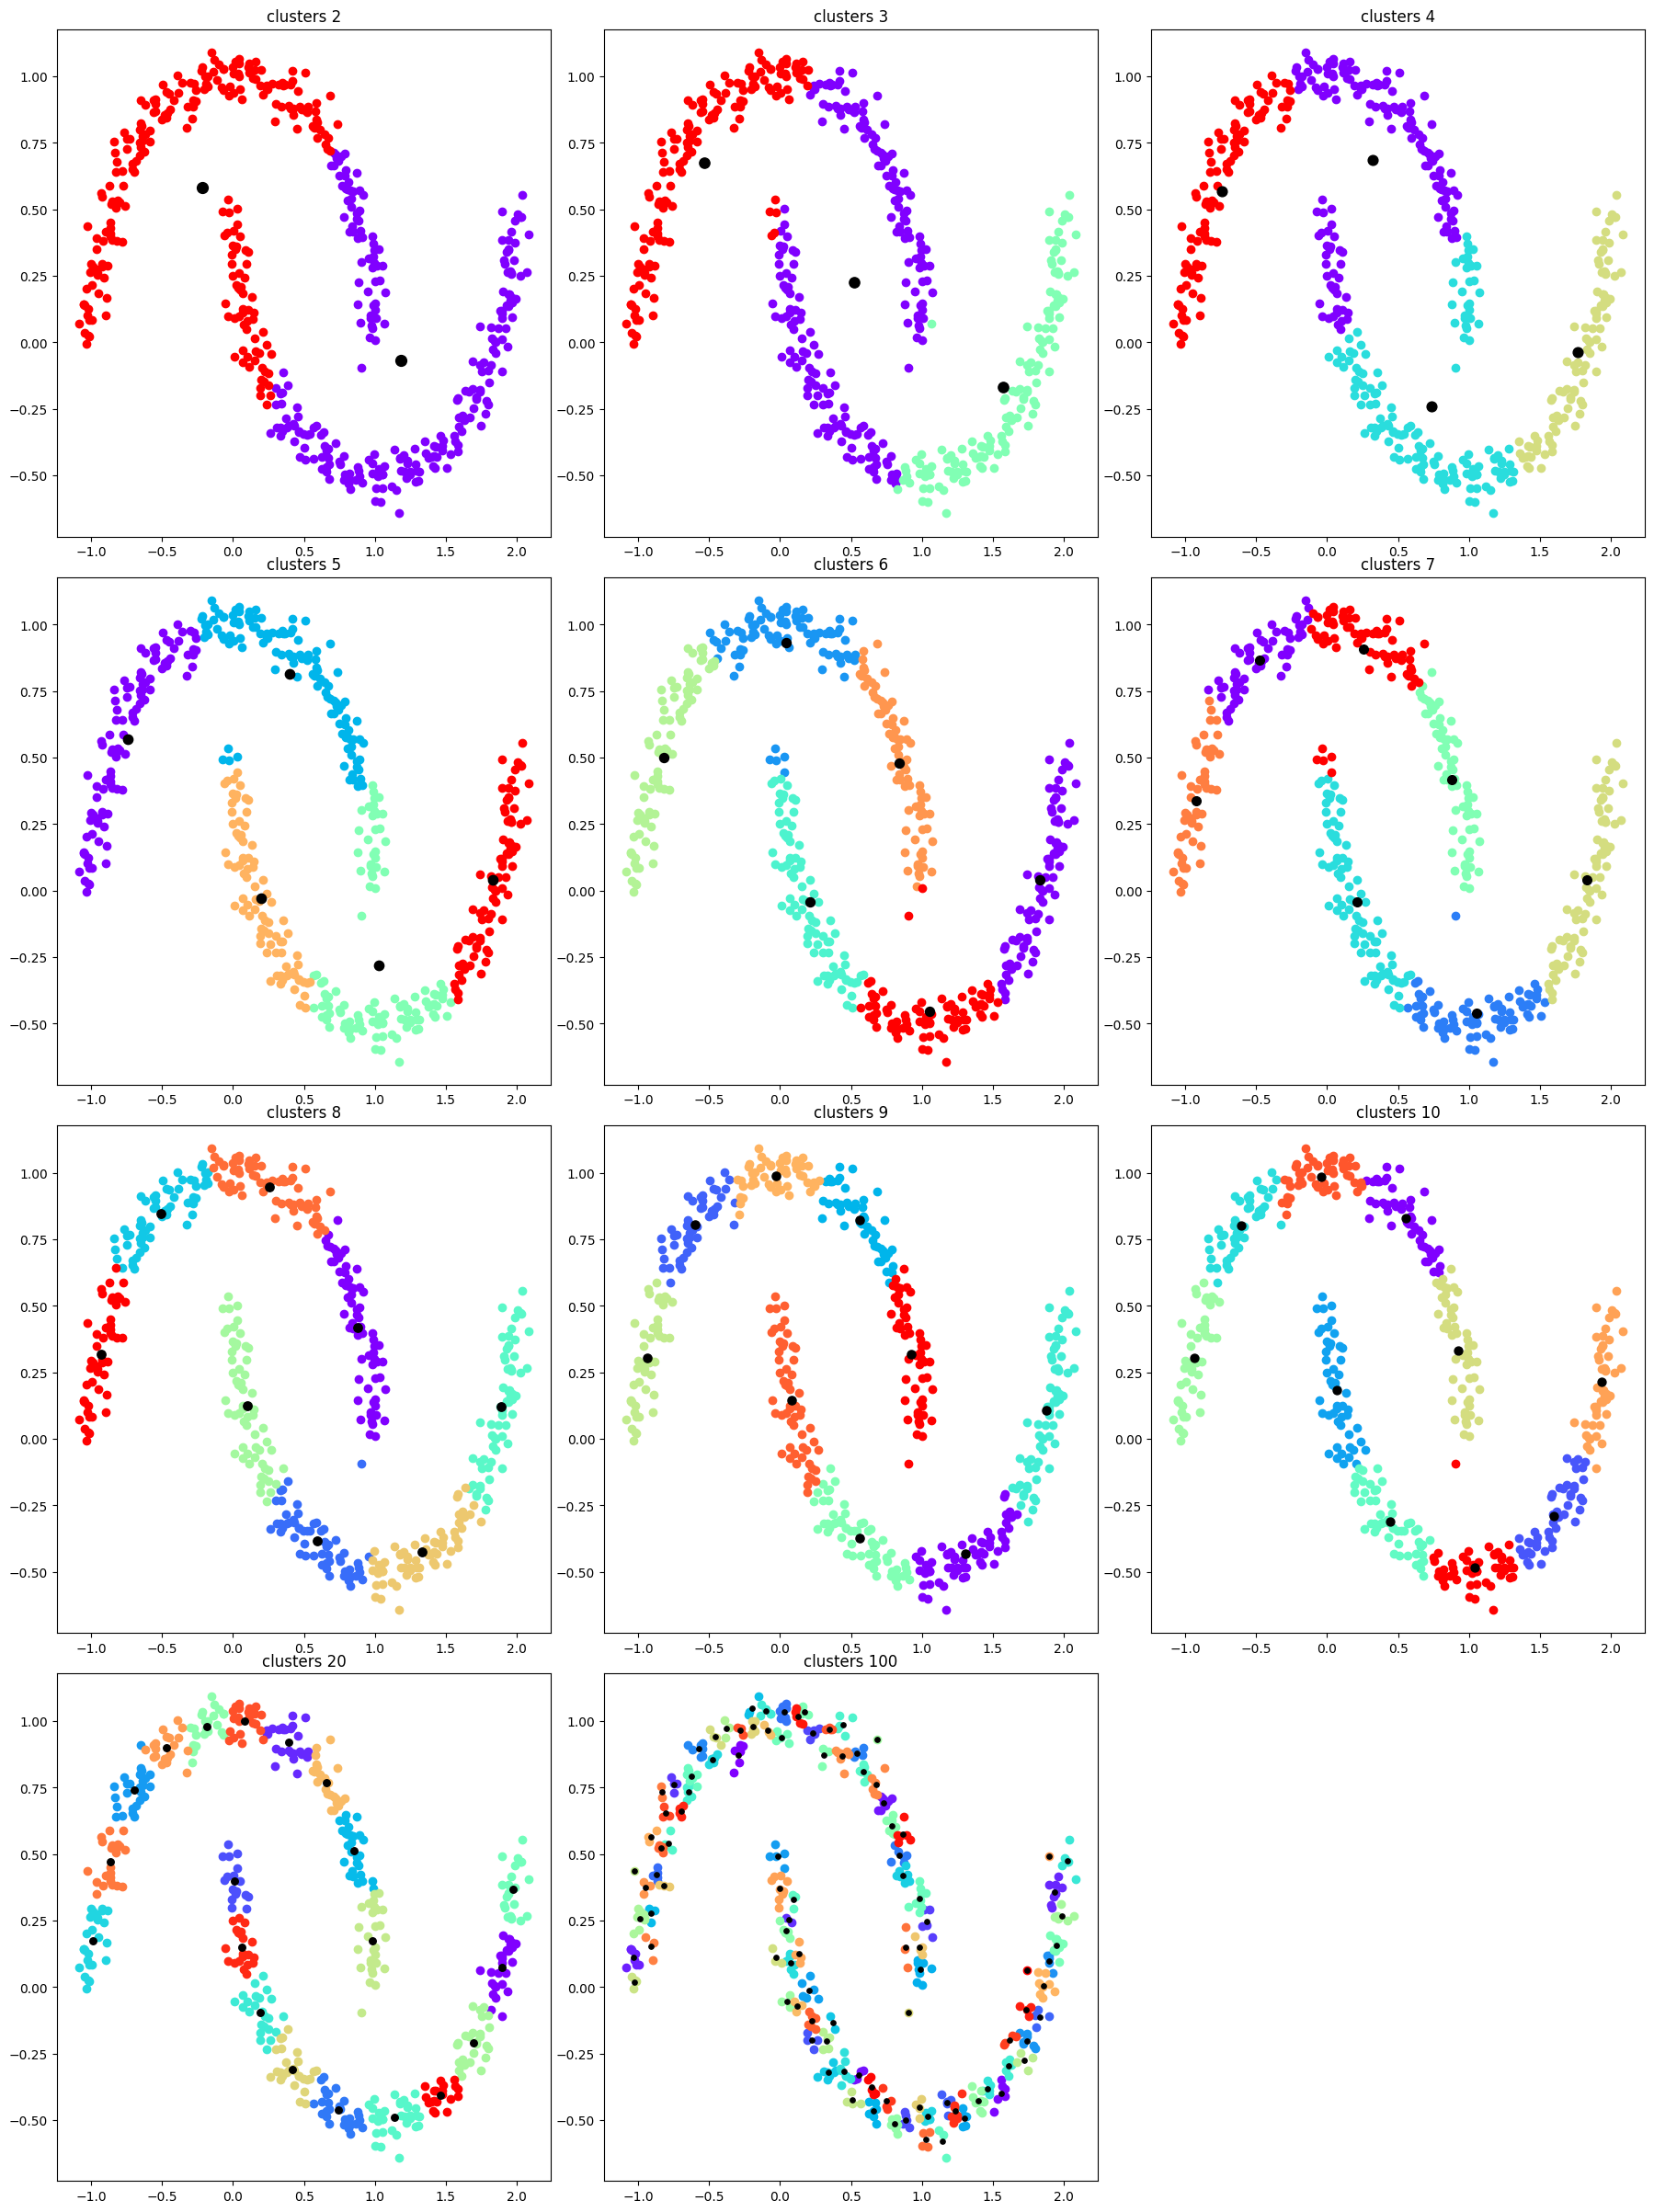

In [9]:
plot_clusters_arr(moons,KMeans(),[2,3,4,5,6,7,8,9,10,20,100])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

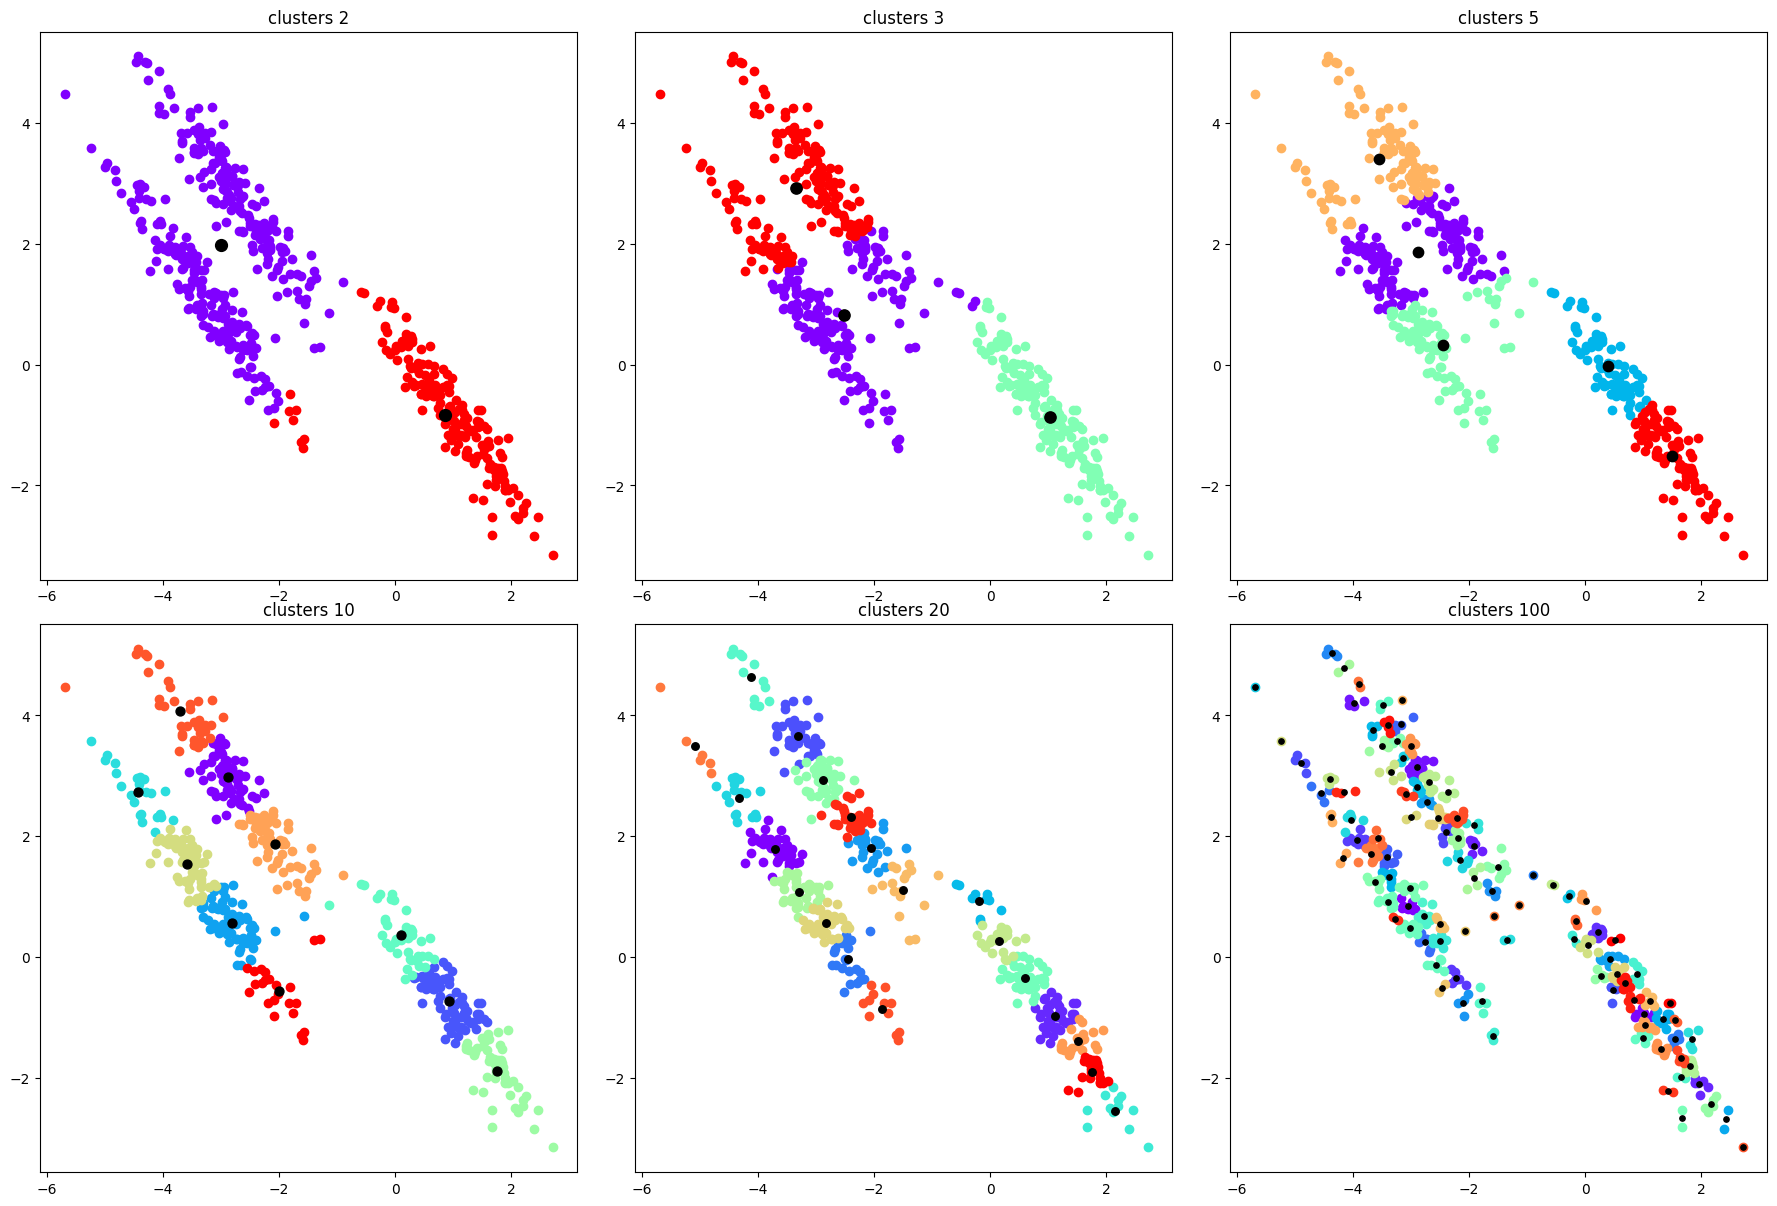

In [10]:
plot_clusters_arr(ellipses,KMeans(),[2,3,5,10,20,100])

In [11]:
def plot_dbscan_clusters(data,clf):

    n = data.shape[1]

    data_X = data.iloc[:,:n-1].to_numpy()
    data_Y = data.iloc[:,[n-1]].to_numpy()

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    fig, ax = plt.subplots()

    

    label = clf.fit_predict(data_X)


    
    
    u_labels = np.unique(label)
    
    x = np.arange(len(u_labels))
    ys = [i+x+(i*x)**2 for i in range(len(u_labels))]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(ys)))

    for i,col in zip(u_labels,colors):
        ax.scatter(data_X[label == i , 0] , data_X[label == i , 1] , label = i, color=col)
    params = clf.get_params()
    ax.set_title("eps "+ str(params["eps"])+", min_samples "+str(params["min_samples"]))
    fig.show()


In [12]:
def plot_dbscan_arr(data,clf,arr):
    n = data.shape[1]

    data_X = data.iloc[:,:n-1].to_numpy()
    data_Y = data.iloc[:,[n-1]].to_numpy()

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    fig, ax = plt.subplots((len(arr)-1)//3+1,3,figsize=(3*6, ((len(arr)-1)//3+1)*6))

    for i in range(len(arr),len(ax.flat)):
        fig.delaxes(ax.flat[i])

    fig.tight_layout() 
    for p,val in enumerate(arr):

        clf.set_params(**{"eps":val[0],"min_samples":val[1]})
        

        

        label = clf.fit_predict(data_X)



        
        
        u_labels = np.unique(label)
        
        x = np.arange(len(u_labels))
        ys = [i+x+(i*x)**2 for i in range(len(u_labels))]
        colors = plt.cm.rainbow(np.linspace(0, 1, len(ys)))

        for i,col in zip(u_labels,colors):
            if i == -1:
                ax.flat[p].scatter(data_X[label == i , 0] , data_X[label == i , 1] , label = i,color="black")
            else:
                ax.flat[p].scatter(data_X[label == i , 0] , data_X[label == i , 1] , label = i)
        params = clf.get_params()
           
        ax.flat[p].set_title("eps "+ str(params["eps"])+", min_samples "+str(params["min_samples"]))

        
    
    fig.show()

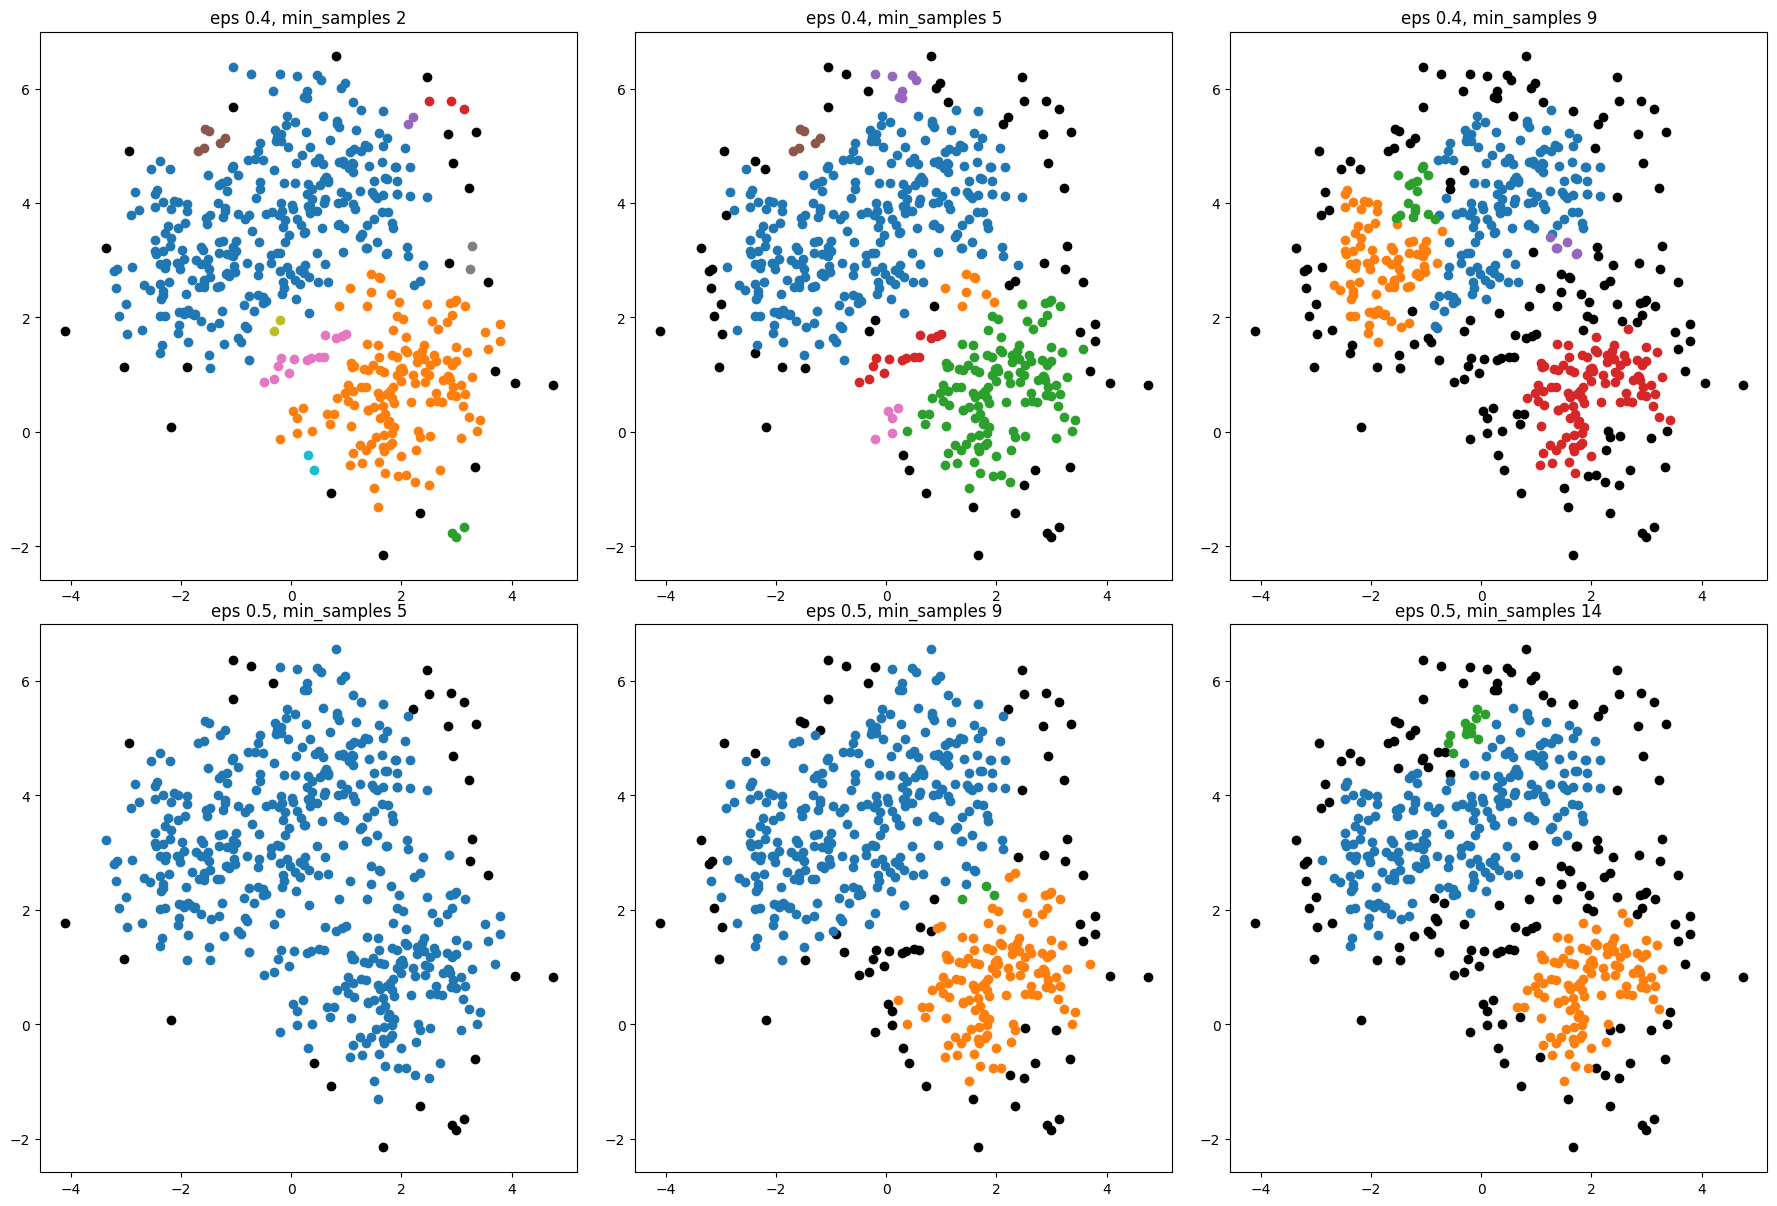

In [13]:
plot_dbscan_arr(blobs, DBSCAN(),[(0.4,2),(0.4,5),(0.4,9),
                                (0.5,5),(0.5,9),(0.5,14)])

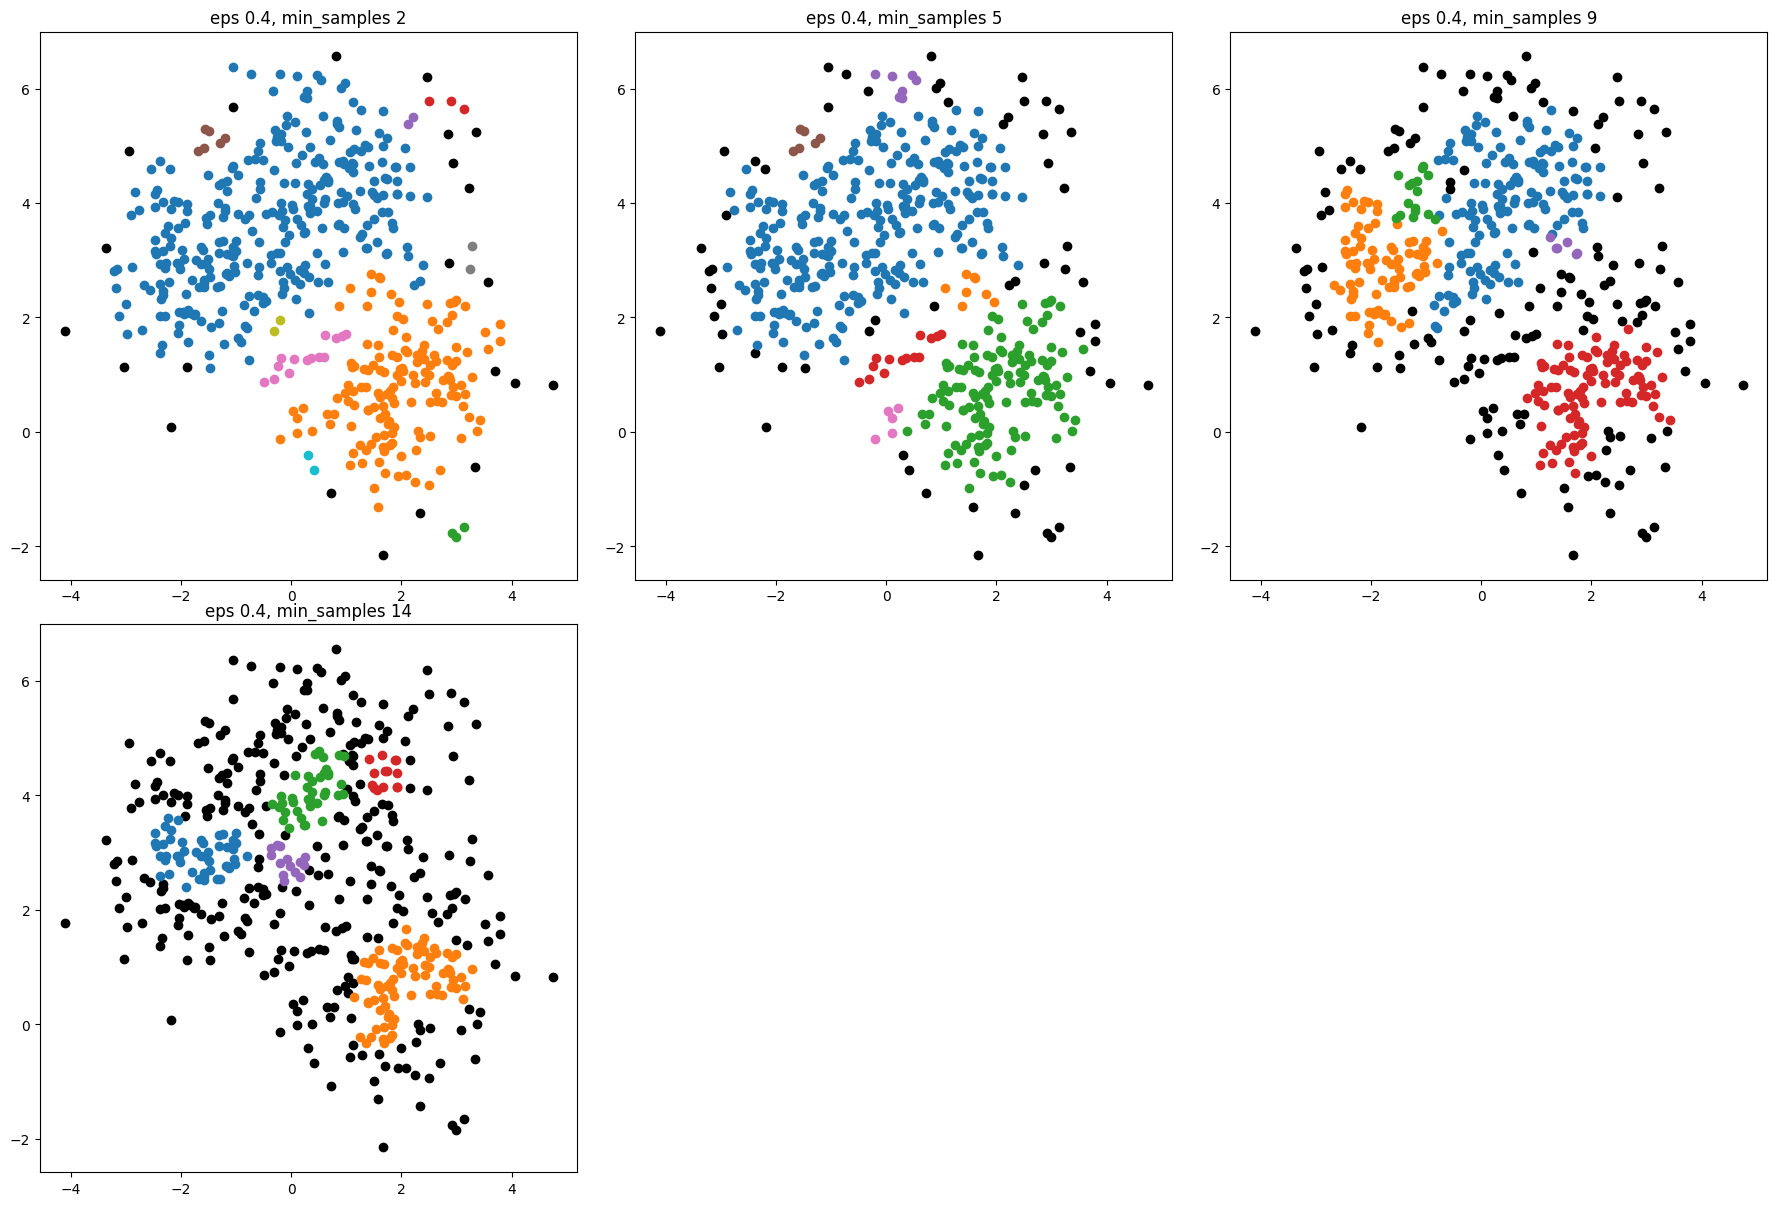

In [14]:
plot_dbscan_arr(blobs, DBSCAN(),[(0.4,2),(0.4,5),(0.4,9),(0.4,14)])

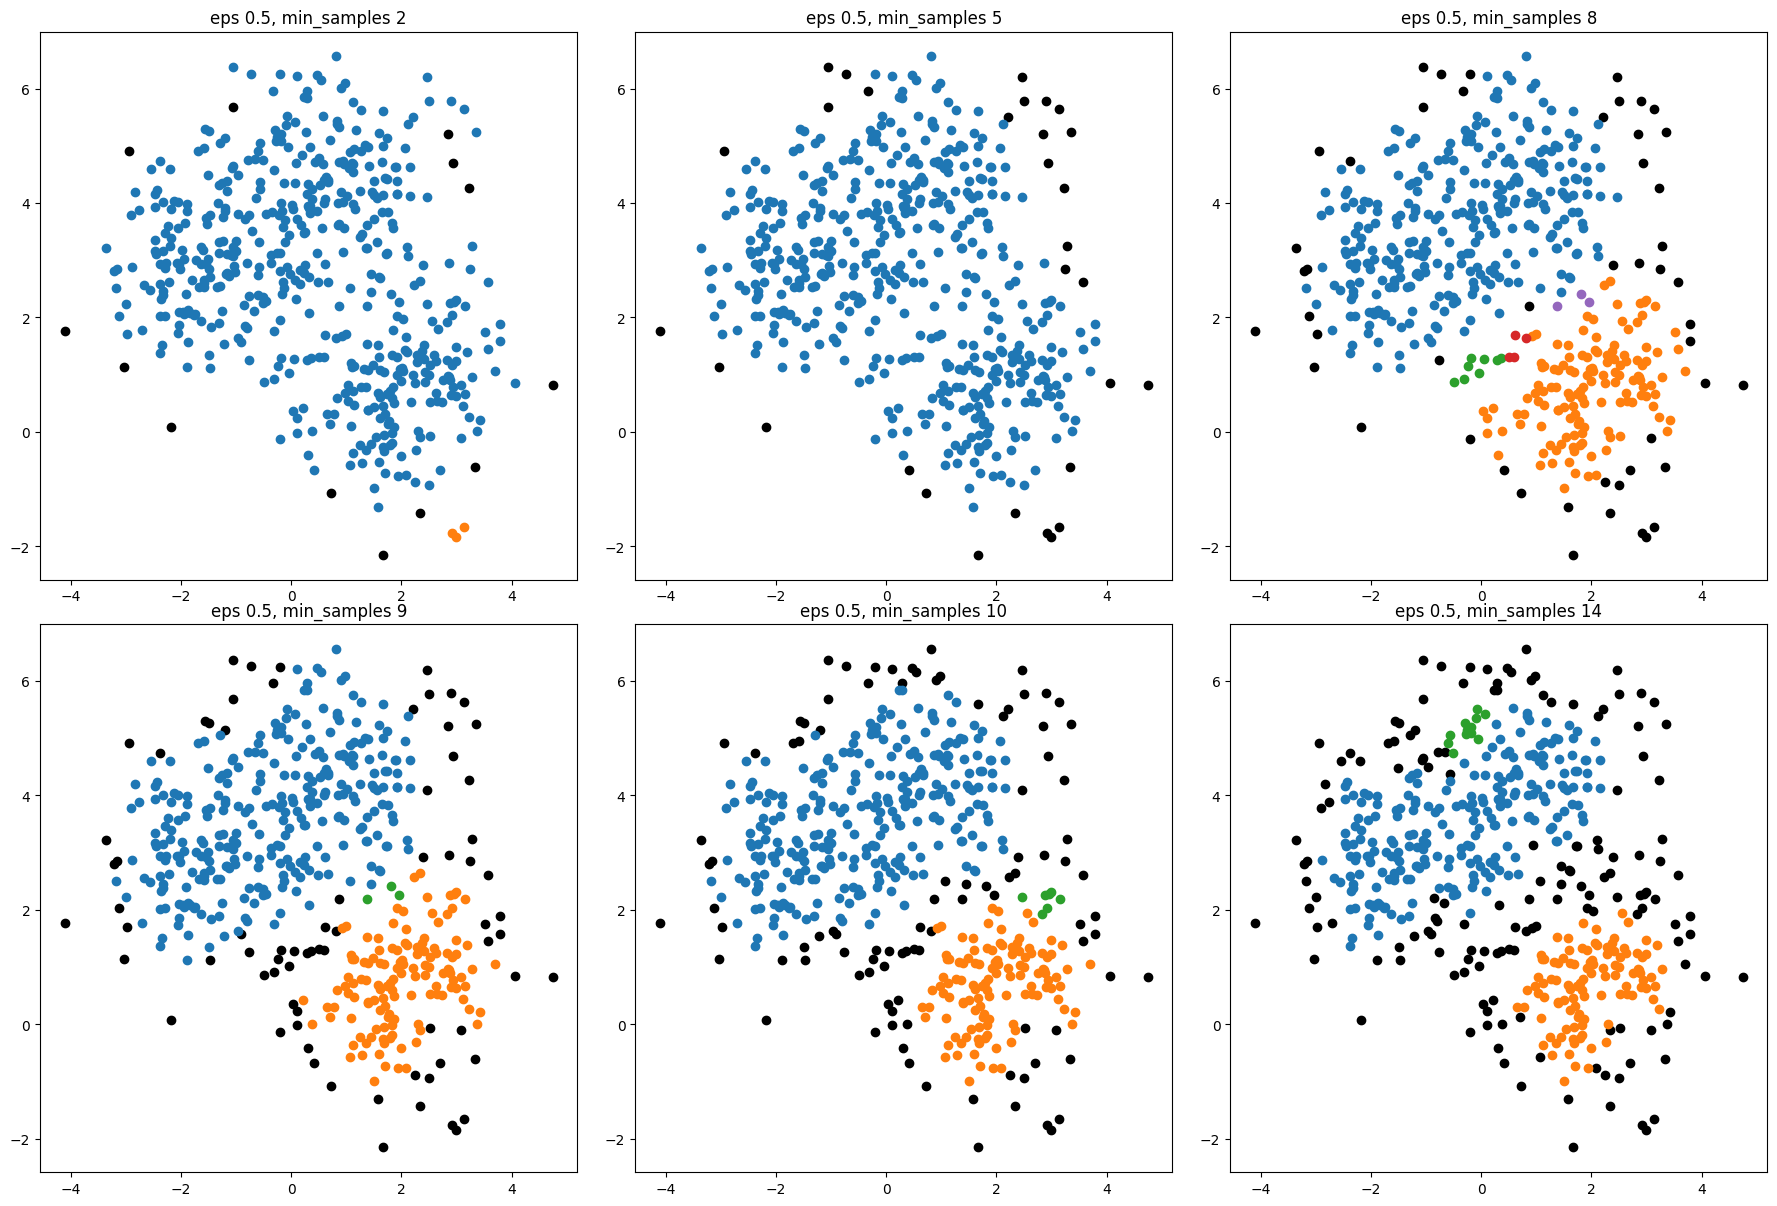

In [15]:
plot_dbscan_arr(blobs, DBSCAN(),[(0.5,2),(0.5,5),(0.5,8),(0.5,9),(0.5,10),(0.5,14)])

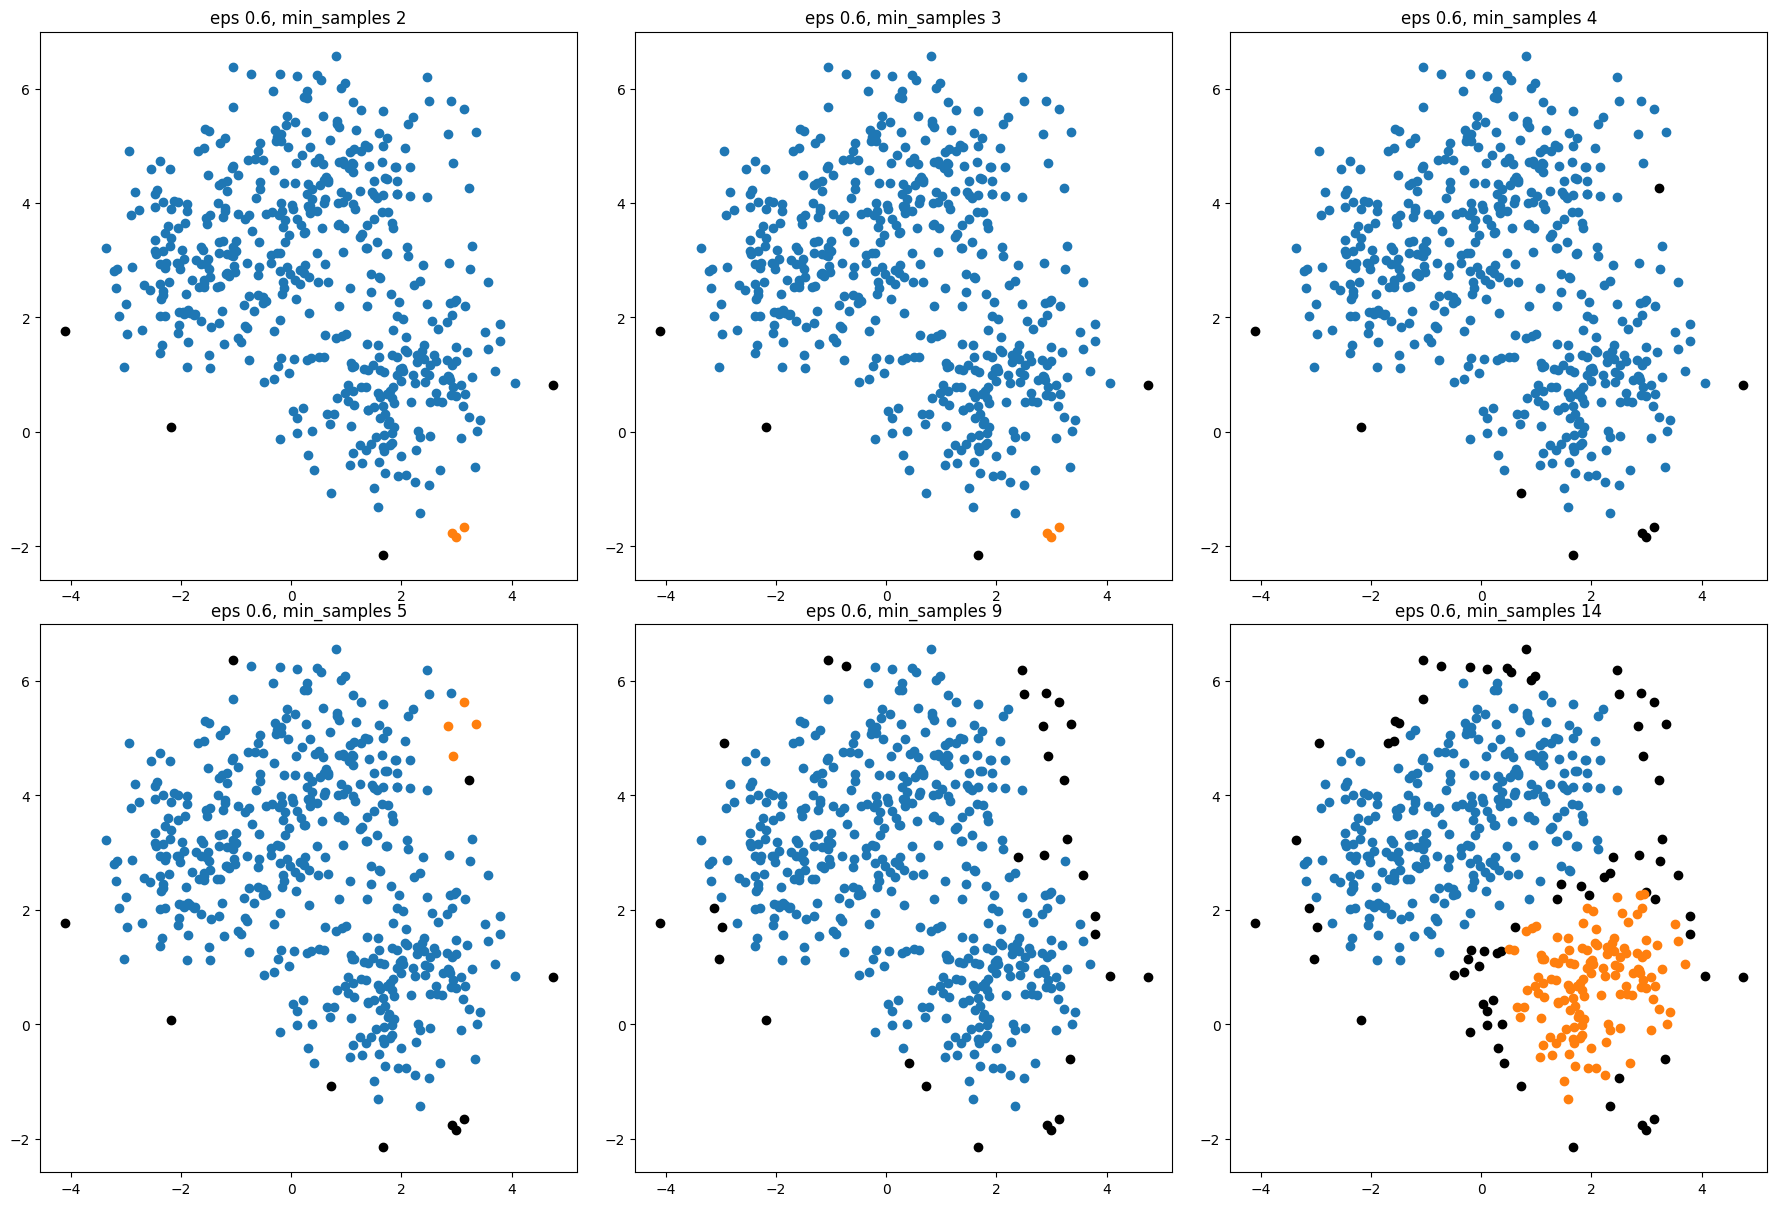

In [16]:
plot_dbscan_arr(blobs, DBSCAN(),[(0.6,2),(0.6,3),(0.6,4),(0.6,5),(0.6,9),(0.6,14)])

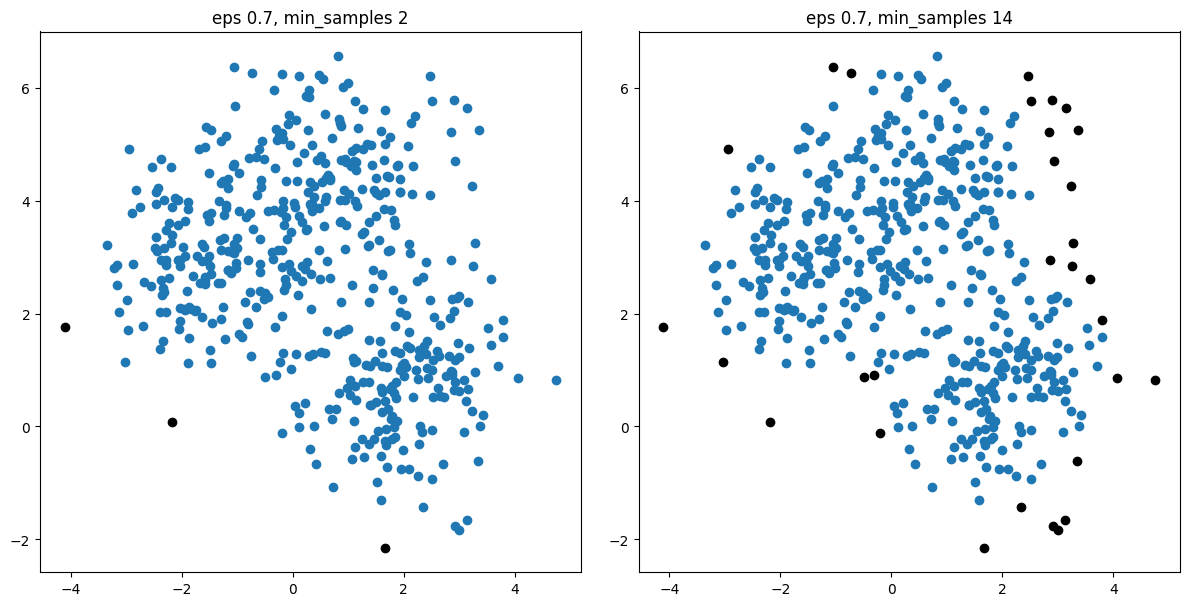

In [17]:
plot_dbscan_arr(blobs, DBSCAN(),[(0.7,2),(0.7,14)])

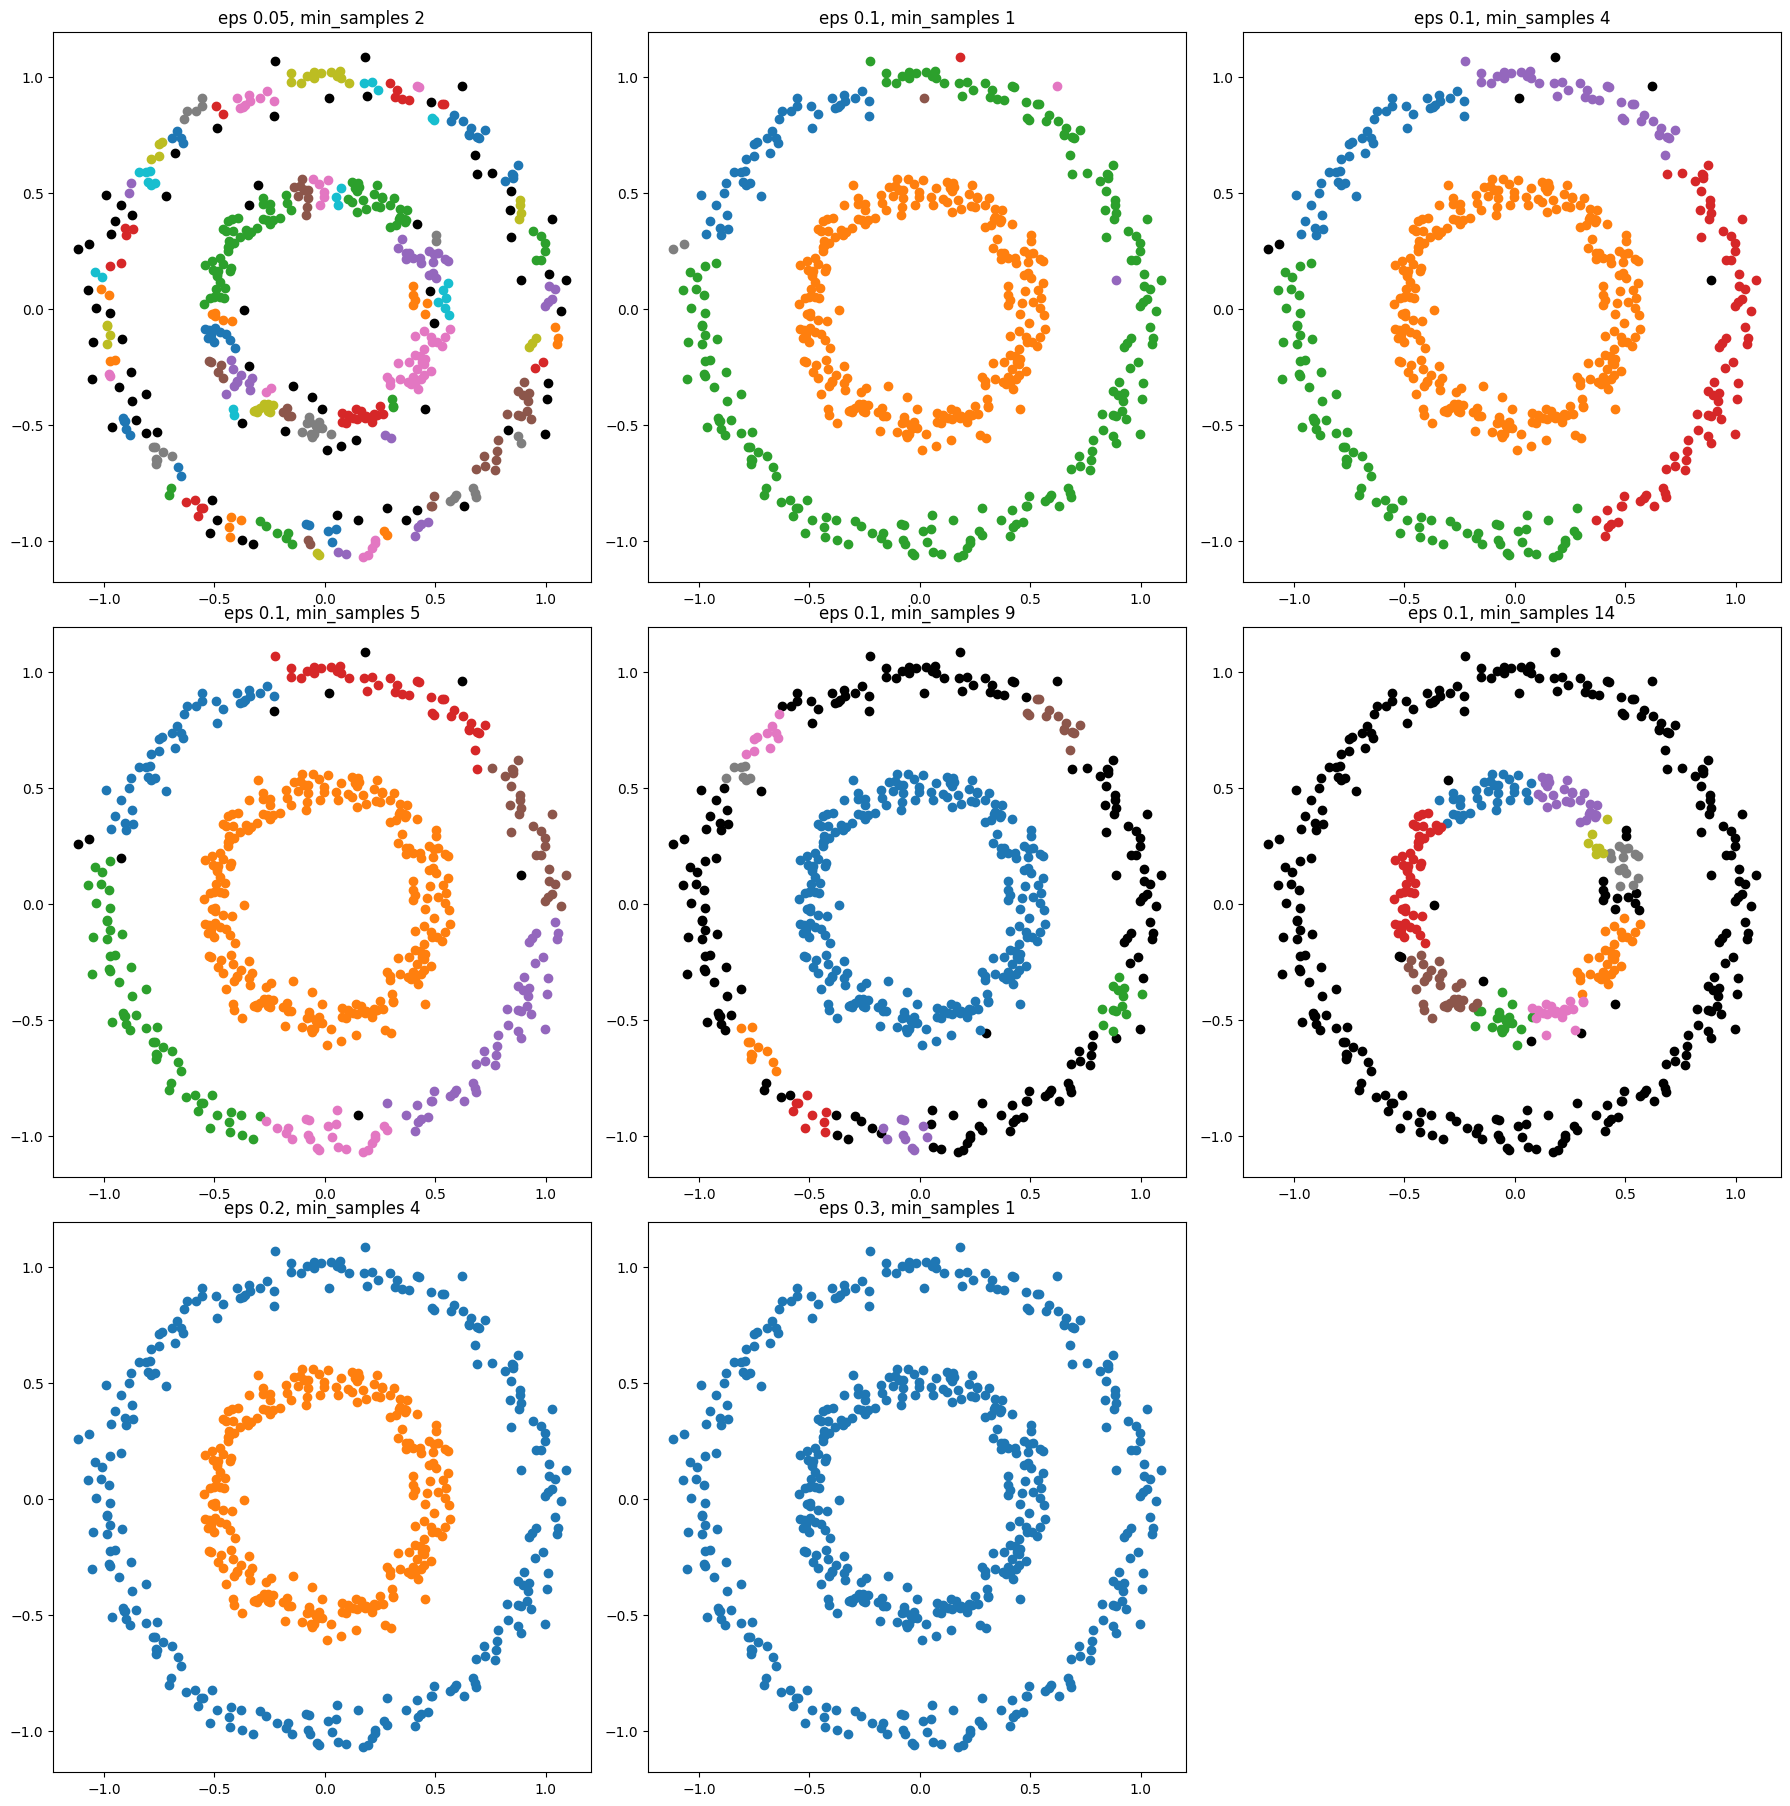

In [18]:
plot_dbscan_arr(circles,DBSCAN(),[(0.05,2),
                                    (0.1,1),(0.1,4),(0.1,5),(0.1,9),(0.1,14),
                                  (0.2,4),(0.3,1)])

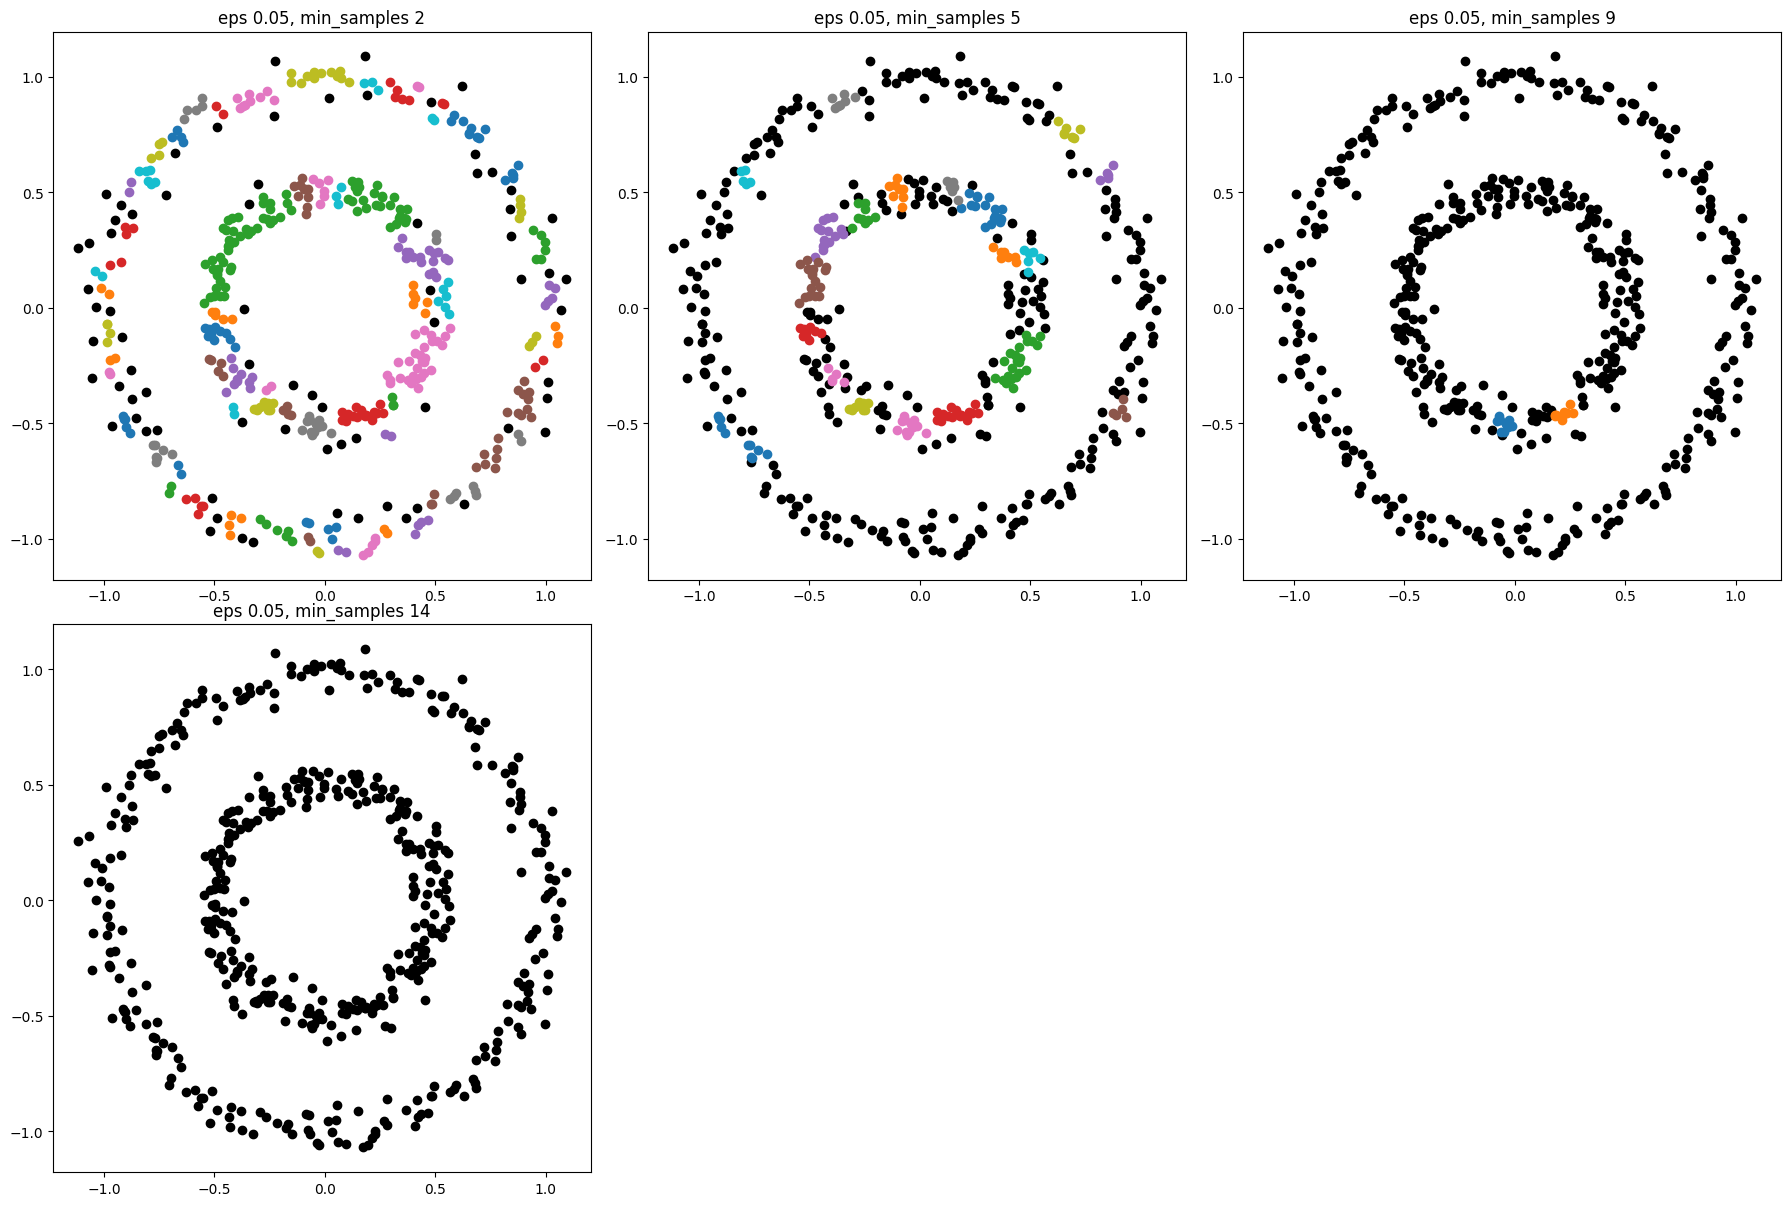

In [19]:
plot_dbscan_arr(circles,DBSCAN(),[(0.05,2),(0.05,5),(0.05,9),(0.05,14),])

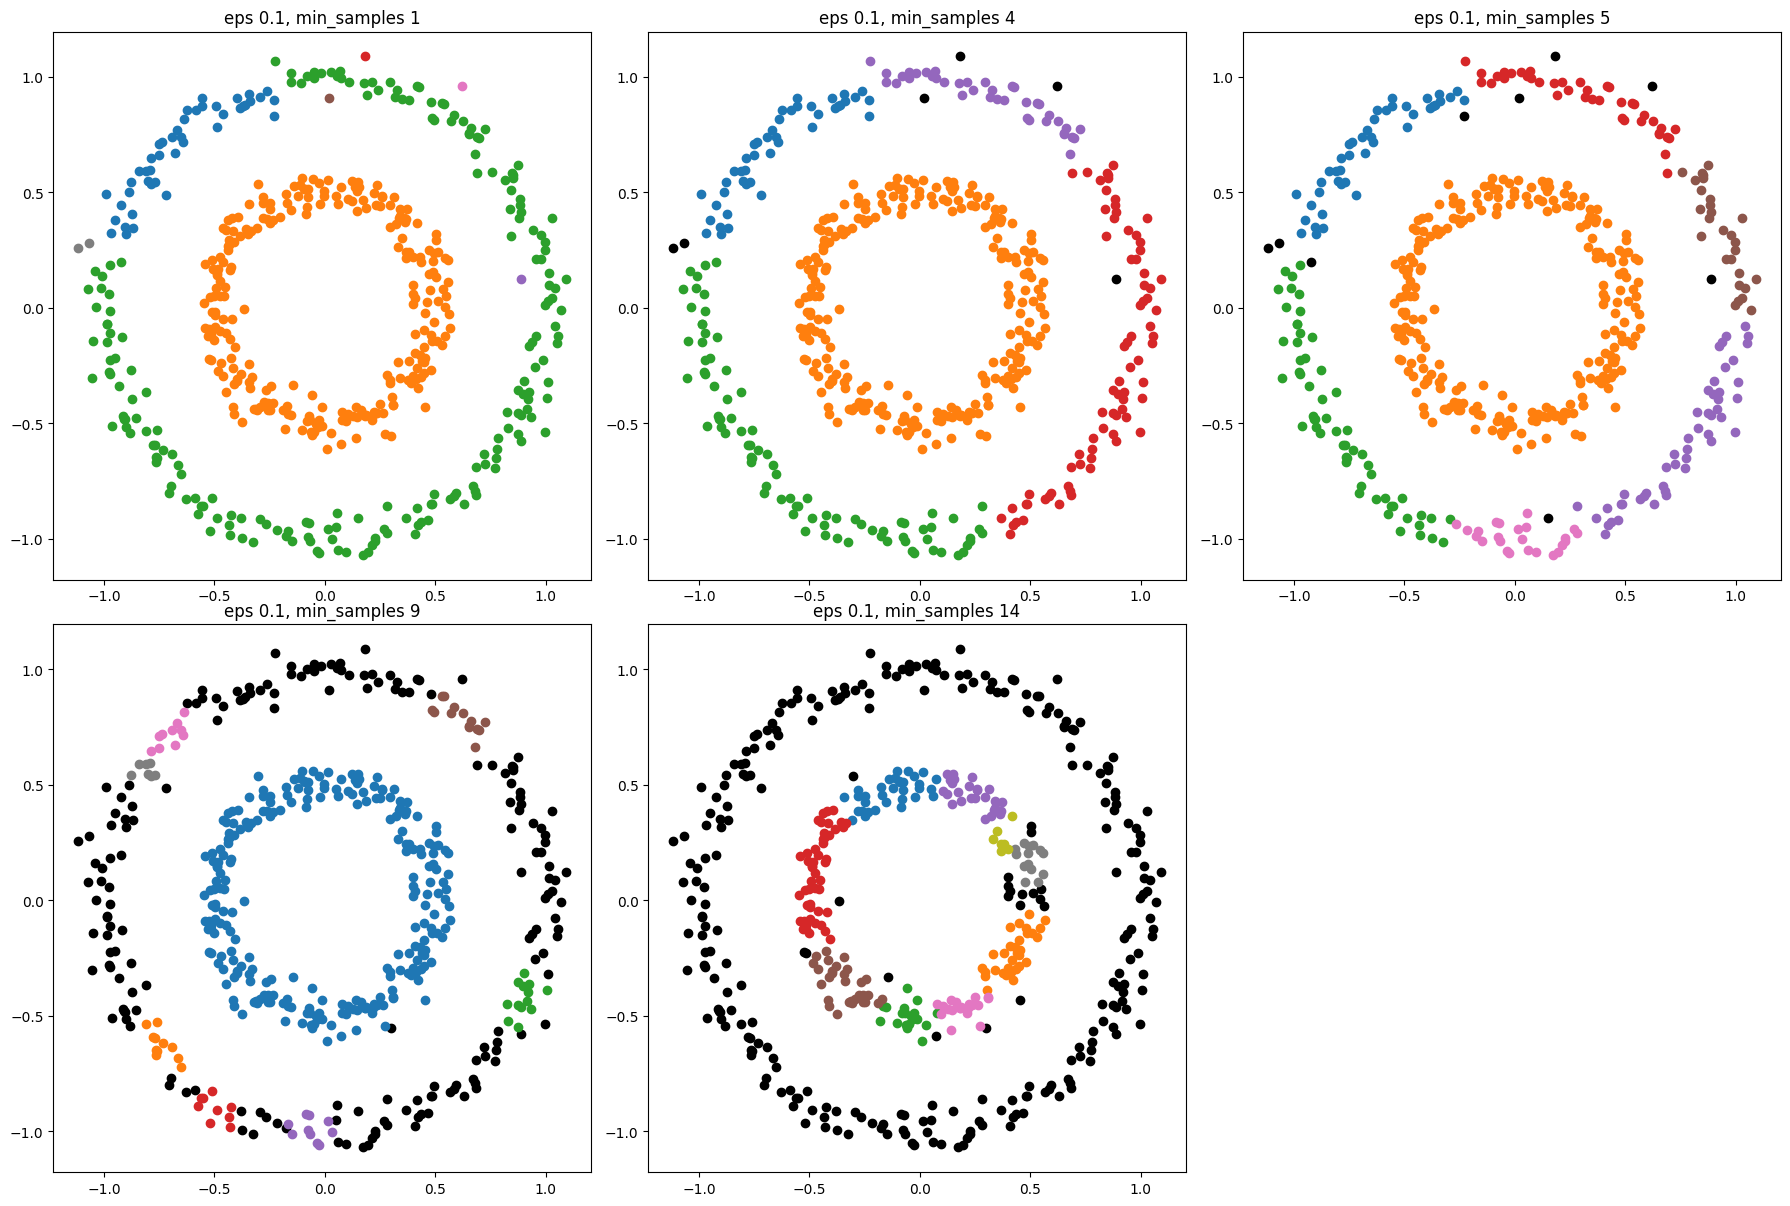

In [20]:
plot_dbscan_arr(circles,DBSCAN(),[(0.1,1),(0.1,4),(0.1,5),(0.1,9),(0.1,14)])

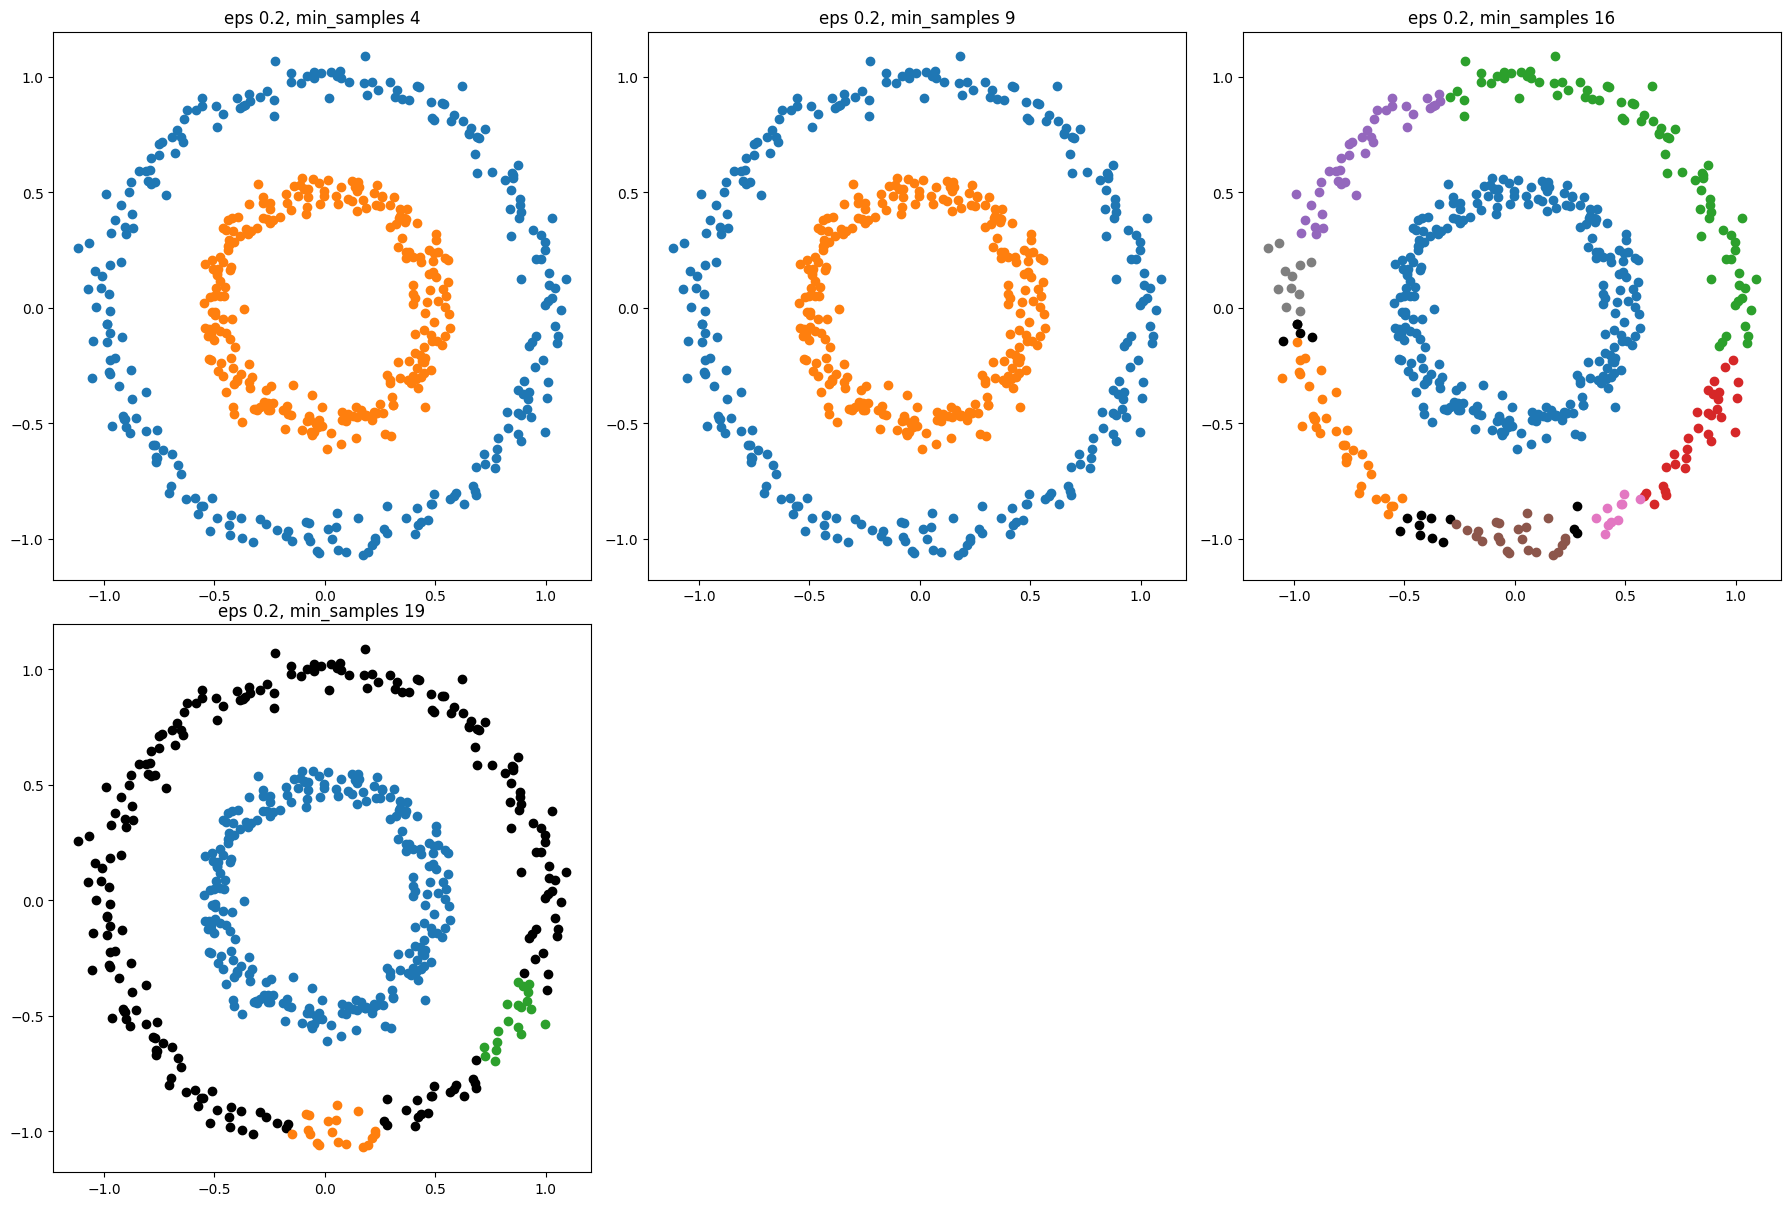

In [21]:
plot_dbscan_arr(circles,DBSCAN(),[(0.2,4),(0.2,9),(0.2,16),(0.2,19)])

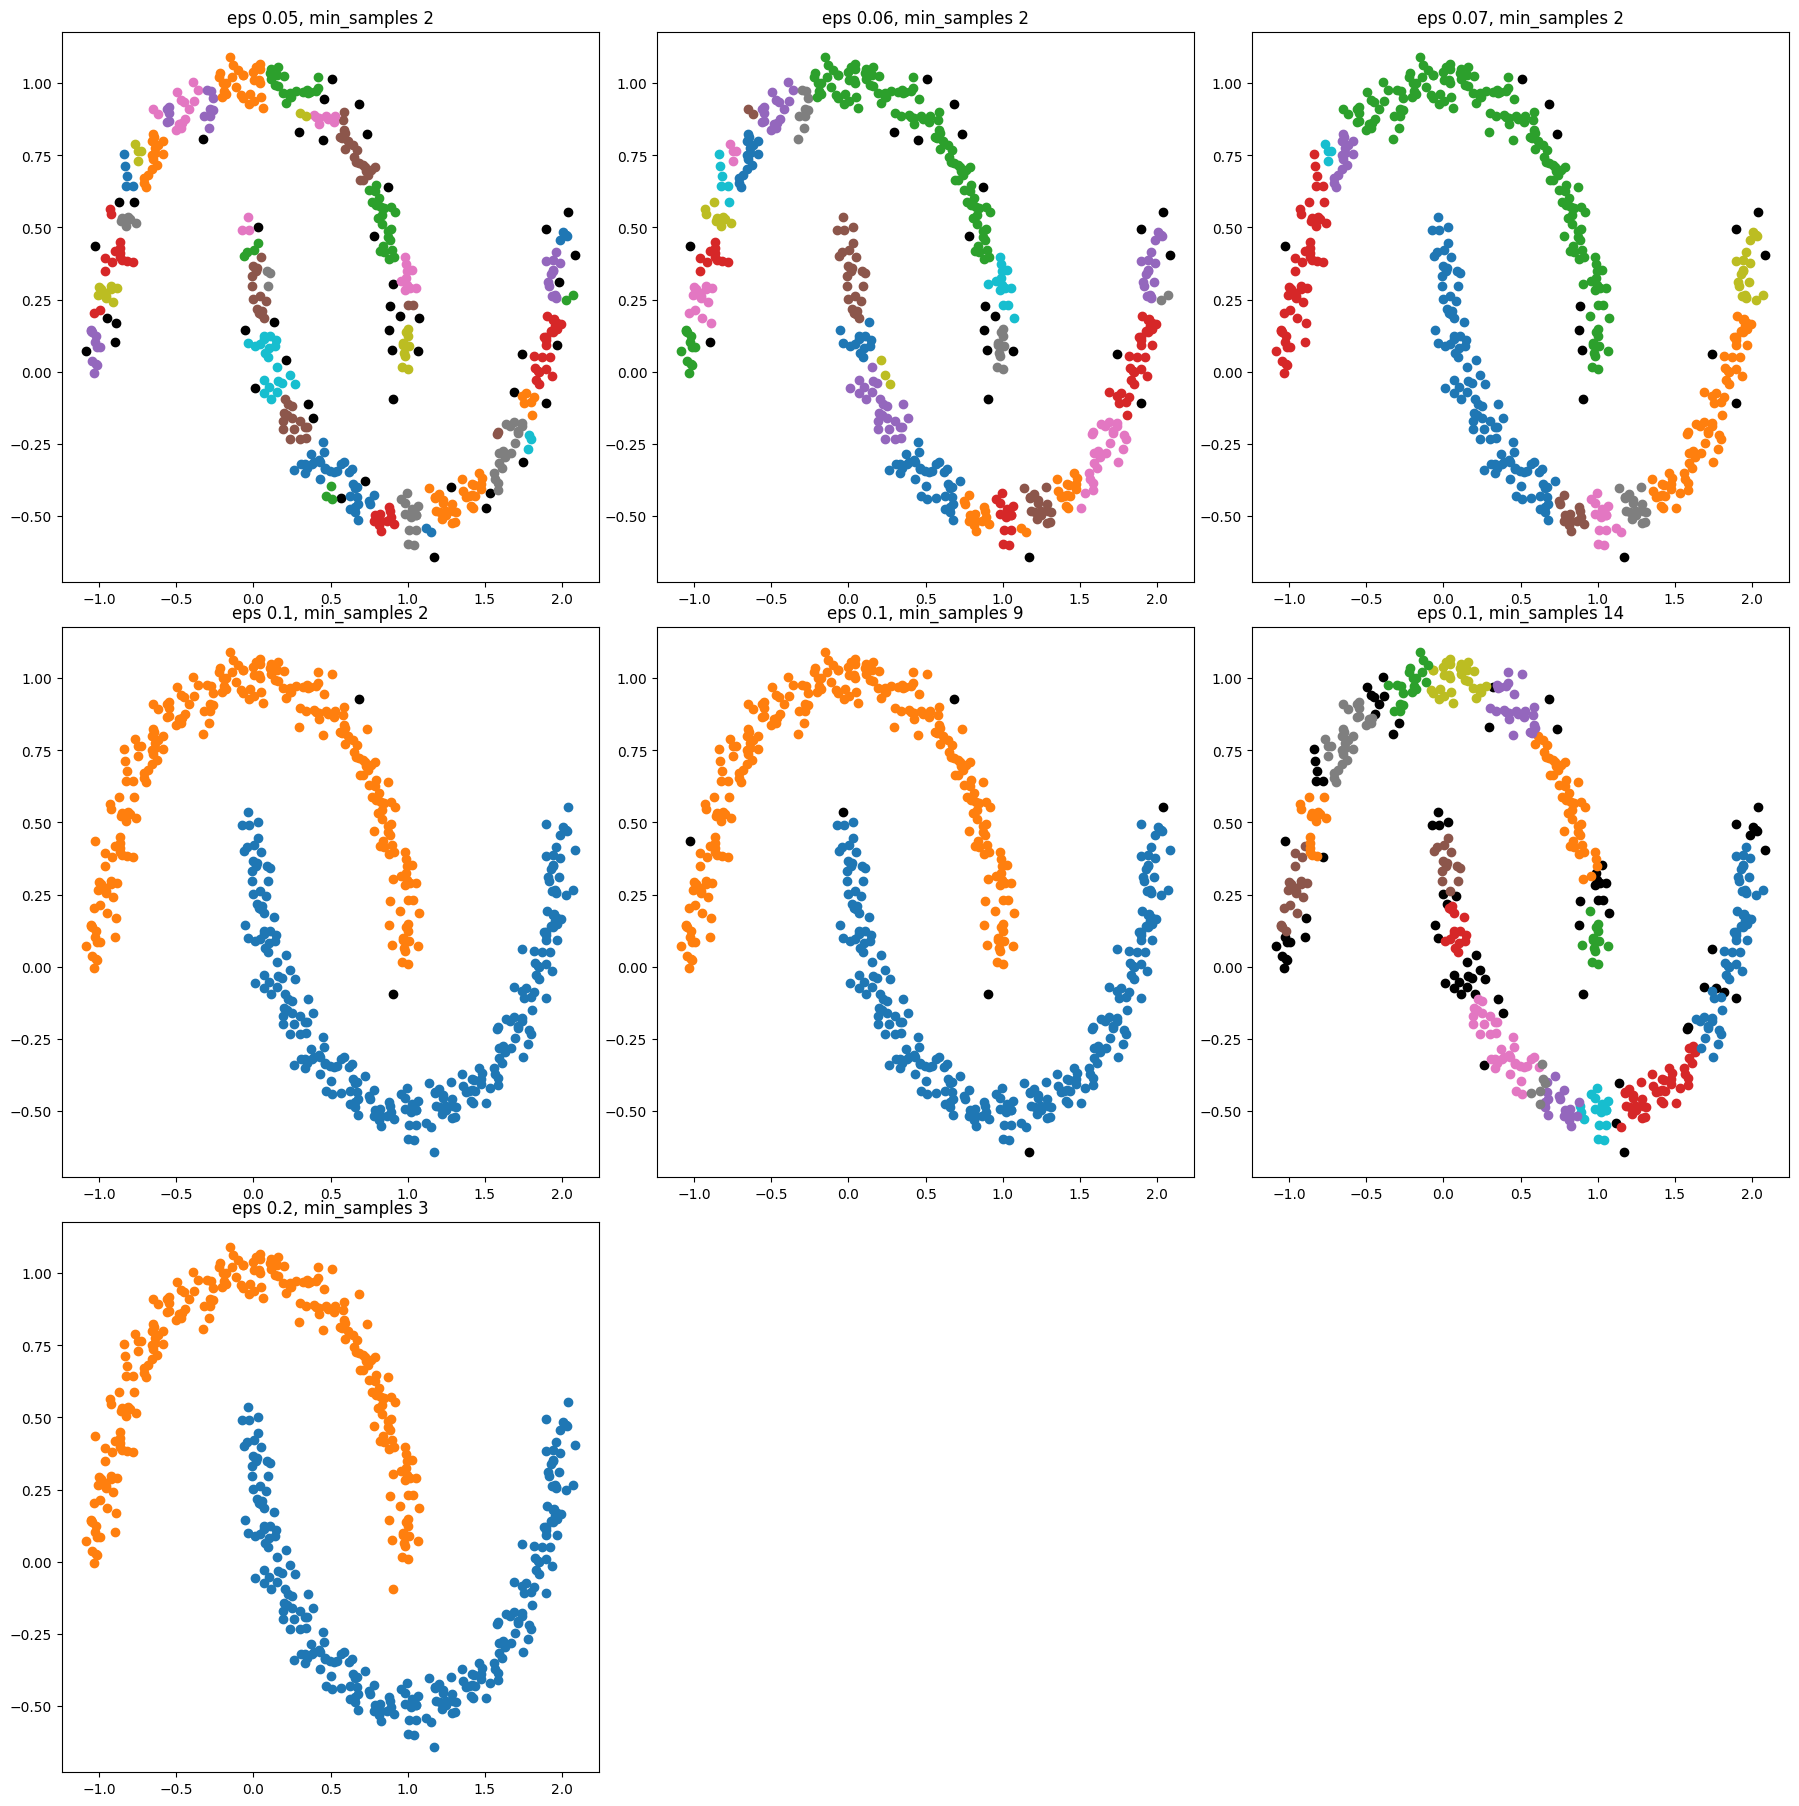

In [30]:
plot_dbscan_arr(moons,DBSCAN(),[(0.05,2),(0.06,2),(0.07,2),
    (0.1,2),(0.1,9),(0.1,14),(0.2,3 )])

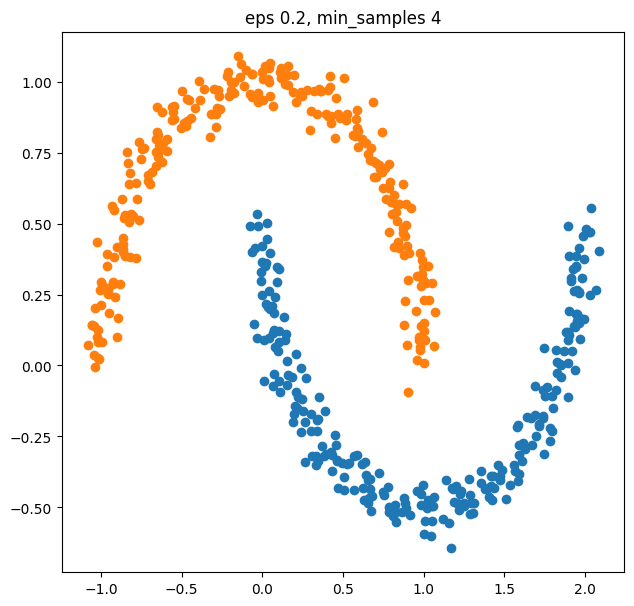

In [23]:
plot_dbscan_arr(moons,DBSCAN(),[(0.2,4)])

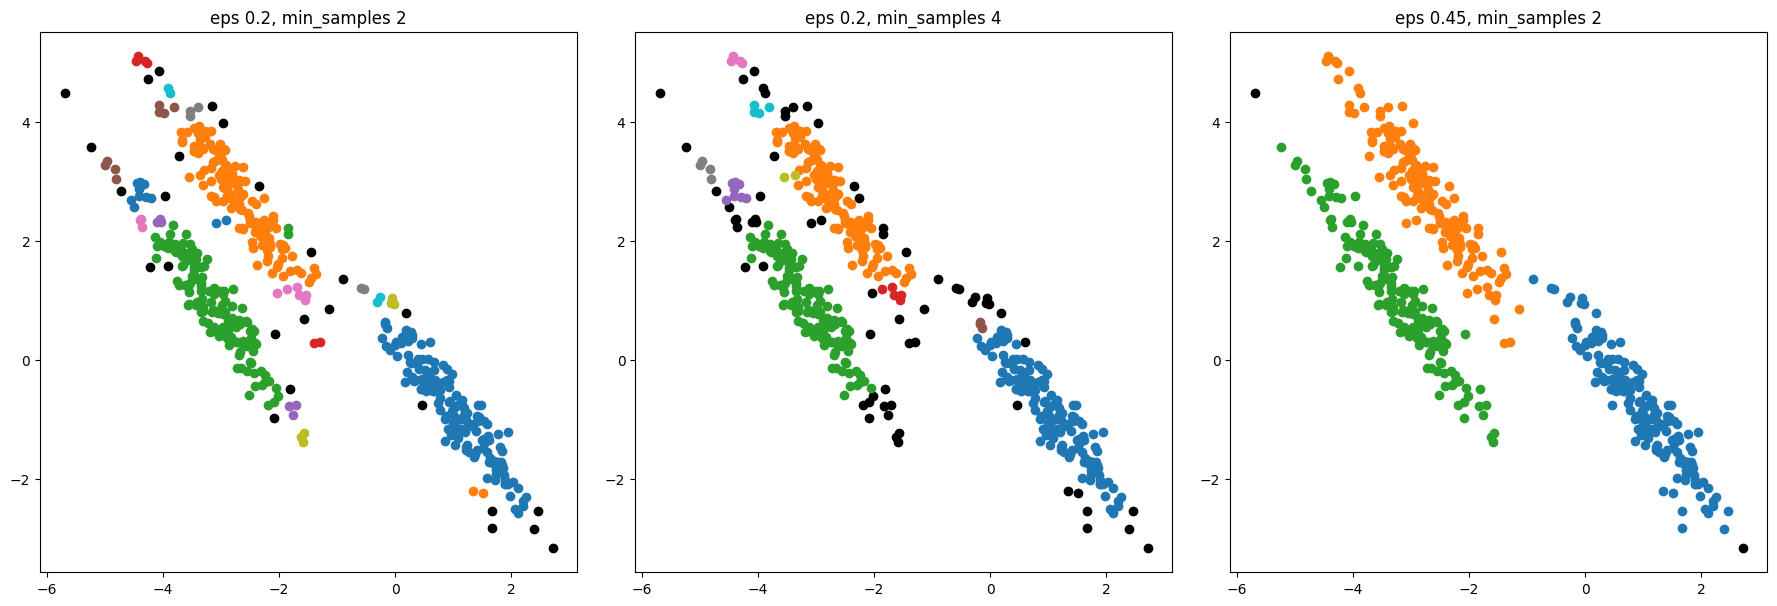

In [24]:
plot_dbscan_arr(ellipses,DBSCAN(),[(0.2,2),(0.2,4),(0.45,2)])

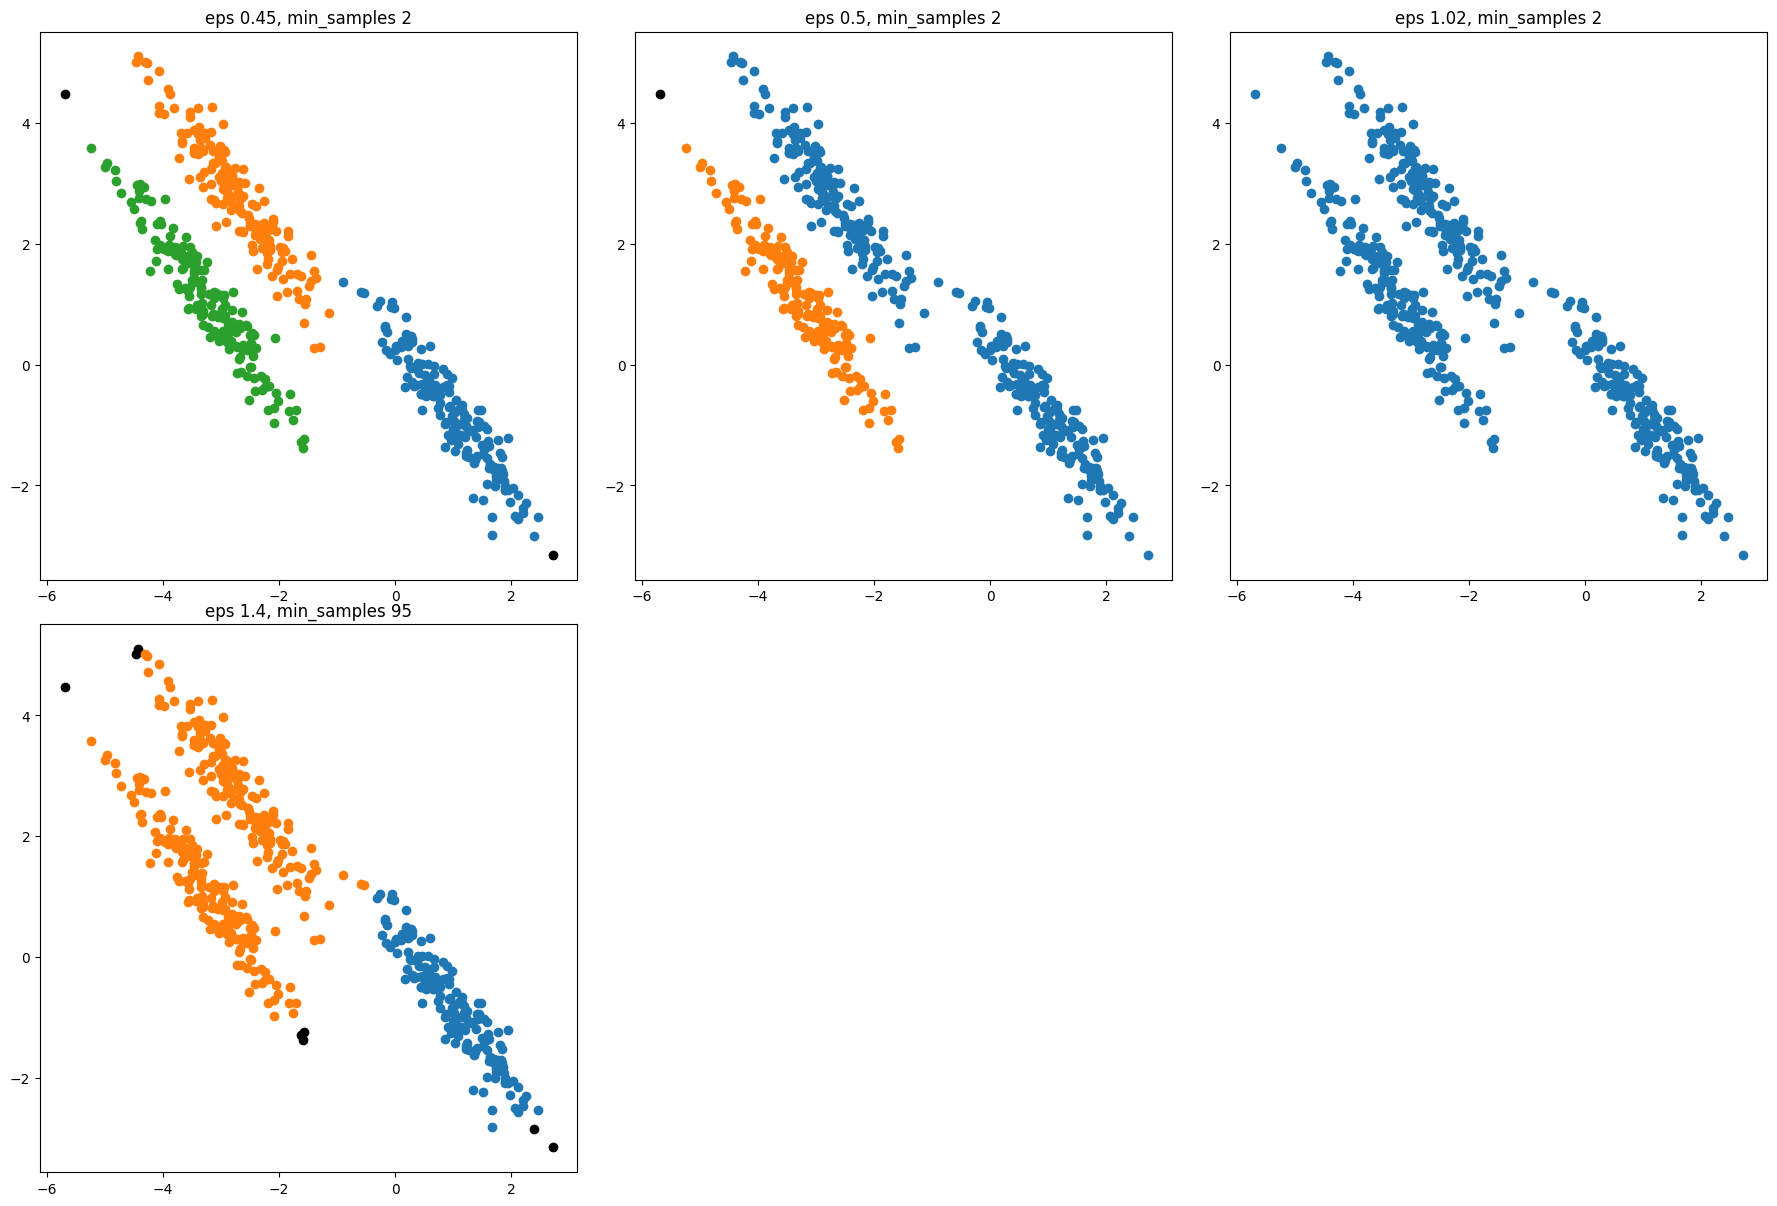

In [58]:
plot_dbscan_arr(ellipses,DBSCAN(),[(0.45,2),(0.5,2),(1.02,2),(1.4,95)])

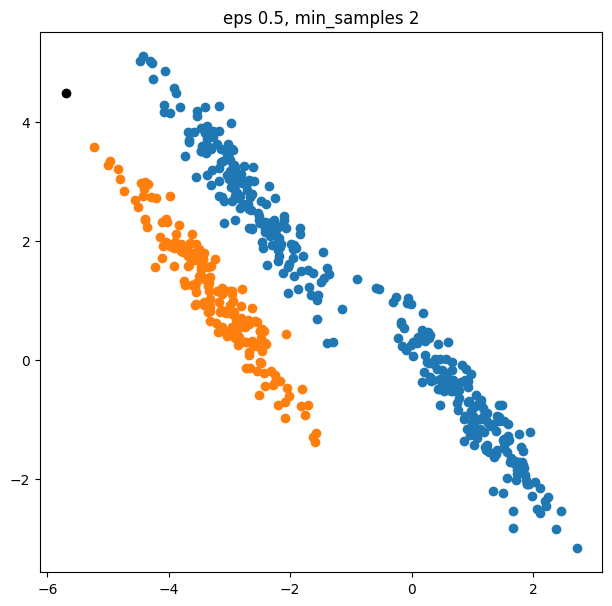

In [26]:
plot_dbscan_arr(ellipses,DBSCAN(),[(0.5,2)])

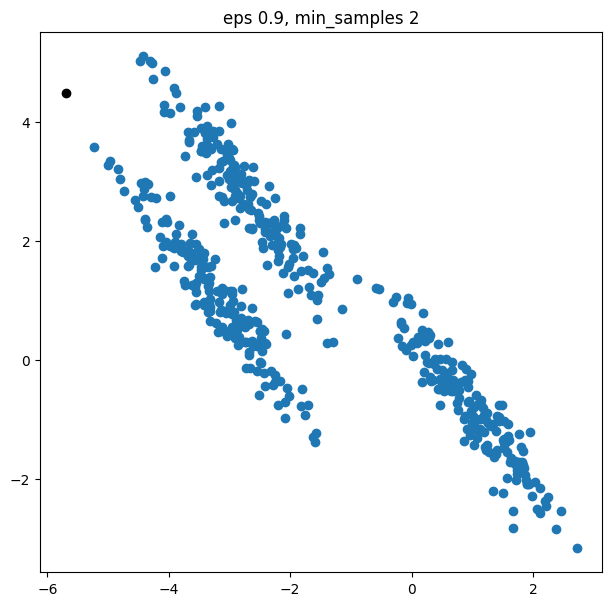

In [27]:
plot_dbscan_arr(ellipses,DBSCAN(),[(0.9,2)])